# Tanzania Water Wells Project Prediction Analysis

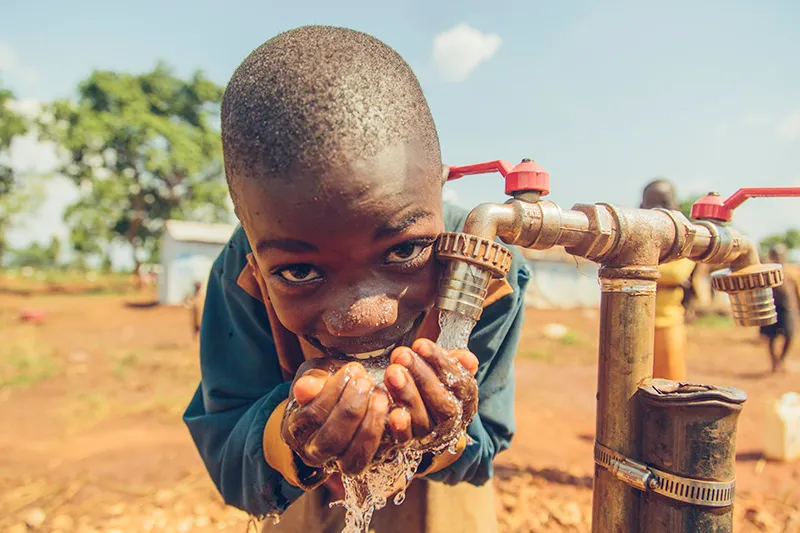

[watermission](https://watermission.org/news/largest-solar-water-treatment-project-in-tanzania/)

### Business Understanding

Water is life. Water is a fundamental need for all human beings, imperative to their survival. However, access to clean water remains a huge challenge for many people with [2.1 billion people](https://www.discoverdatascience.org/social-good/clean-water/) lacking access to clean water around the globe.
Tanzania is one of the nations that faces a clean water crisis with farmers lacking water for irrigation, poor sanitation for many households and schools, and many poor sanitation diseases such as typhoid and cholera remain rampant in the communities. 

People need water not only to stay healthy and thrive but also for the nation's development. According to a [World Bank
2012 article](https://blogs.worldbank.org/africacan/tanzania-water-is-life-but-access-remains-a-problem), water is integral to the development of a country's industrial, energy and agricultural sectors. The Tanzanian economy is a lower-middle income
economy that is heavily reliant on agriculture. Therefore, inaccessibility to clean water significantly affects Tanzanian's population's
health as well as their economy. 

Many households in Tanzania lack access to clean water through pipes and other clean water sources both in
the rural and urban areas. A [2019 World Health Organization report](https://www.wvi.org/stories/tanzania/solving-water-challenge-tanzania-our-commitment-most-vulnerable) stated that only 56% of households have access to clean drinking water, there are also 432,000 deaths every year resulting from diarrhoea and poor sanitation in the country. Only a third of the households in Tanzania have accesss to treated clean water. 

Furthermore [reasearch studies](https://www.researchgate.net/publication/333827509_Why_Do_So_Many_Water_Points_Fail_in_Tanzania_An_Empirical_Analysis_of_Contributing_Factors_WPS8729) by World Bank Group in 2019 showed that 29% of all waterpoints in Tanzania are non functional with 20% of them failing in the first year of installation and 40% failing within 20 years(long-term). This is a major problem for NGOs who invest funds in addressing the clean water crisis in this country.

Ensuring access to clean water and functionality of waterpoints are therefore objectives of many NGOs as a form of intervention to address this public health crisis and development challenge. NGOs tasked with contributing
towards the Sustainable Development Goals in relation to the water crisis need to understand the physical infrastructure conditions
of these water sources, why they fail  in order to develop better interventions needed to sustainably address this water crisis. NGOs also need to 
understand where to direct funds either towards maintaining existing functional water systems and types of technologies to invest in  to ensure continued access to clean water.

NGOs are our main stakeholders in this predictive analysis. There are some aspects that need to be explored and answered through this project analysis. Through machine learning predictive analysis with data collected by the Tanzanian Ministry of Water and [Taarifa(technological company)](https://taarifa.org/), we will able to predict which water pumps are functional and which are not to determine which need to be maintained or repaired. We will also explore the cost of water consumption for the people of Tanzania
(do people pay to access water or not), whether management schemes, waterpoint technology and aspects such as population affect conditions of the waterpoint. This information will inform the role that NGOs as well as what kind of support they need from other stakeholders such as the Tanzanian Government, local communities and private firms to close the gap in water access and help Tanzania meet its 2030 SDG goal of providing universal clean and safe water.

In this classification problem, recall is extremely important. This is because, NGOs; the stakeholders are keen on identifying non_functional waterpoints to have them quickly repaired to ensure that people continue to access water. Even if precision is low, and some wells are identified as non_function when they are functional, it will still save people from catching diseases from poor sanitation and from starvation and low development.

This binary classification analysis is a Moringa school phase 3 summative assessment project that needs to be completed in the span of 7days.

#### Project Scope

The primary goal of this project is to develop a model that will predict which water pumps are functional and which are not (completely functional, in need of repair) to help NGOs identify which 
need maintenance, which need to be donated and which ones need repairs.

#### Questions to be Answered


1. Can we predict which water systems are functional and which are not with a high recall score?
2. Does the type of scheme management determine the condition of the waterpoint?
3. Does the type of waterpoint technology determine the condition of the waterpoint?

#### Objectives

1. To be able to predict which water pump systems are functional.
2. To determine what features can be improved to ensure high functionality or better conditions of water pumps.

### Data Understanding

Our [data](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/) for this analysis comes from TAARIFA (a technological data company) and the Tanzanian Ministry of Water and is in the CSV format. The data mainly came from Taarifa waterpoints dashboard. The tech company aggregates data from the Tanzania Ministry of Water and the combined dataset has 59400 rows and 39 features.


Four CSV files have been provided. One titled(Training set values) contains training set values with data on the independent features for the training set. 
The training set labels file (Training set labels) contains data on the dependent variable. 
The test set values (Test set values) contains values that will be used for prediction. 
A submission format (Submission format) has also been provided as this was a data science competition and the results of the analysis need to be in a specific format.



The dependent or target variable which is known as status_group is a categorical variable with three categories; 

1. Functional-which means that the waterpoint is functional and does not needrepairs.

2. Functional needs repairs-the waterpoint is operational, but needs repairs

3. Non functional - the waterpoint is not operational

This ternary analysis will be convered to a binary analysis by combining the functional need repairs category and the non functional category to represent poor condition and functional to represent waterpoints in good condition.

There are 40 independent features in this dataset that include:

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private - [Feature not described]

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False if its location is at a public meeting place

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

#### Importing Modules

In [121]:
#importing the relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import xgboost  as xgb

In [122]:
#loading the dataset with independent features
independent = pd.read_csv("training_set_values.csv")
independent.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [123]:
#iimporting target variable
target = pd.read_csv("training_set_labels.csv")
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [124]:
#looking to see the categories in the target variable
target["status_group"].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

This is a ternary problem that we need to change to a binary classification. We will classify functional pumps as in good condition; 1
and non functional and functional needs repair as 0 meaning; waterpoint pumps in poor condition.

In [125]:
#converting target variable into a binary class
target["status_group"] = target["status_group"].map({"functional needs repair":0, "non functional": 0, "functional": 1})
target["status_group"].value_counts()

1    32259
0    27141
Name: status_group, dtype: int64

There is a little class imbalance in our target variable that will be addressed later with the SMOTE resampling method.

In [126]:
#merging the target and independent variables into one dataset
df = pd.concat([independent, target], axis=1)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,1
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,1
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,1
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,1


The new dataset is a merged dataset containing all the independent and target variables.

In [127]:
#exploring different aspects of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

### Data Cleaning

Firstly, we will address the redundant columns with repetitive information

In [128]:
#expanding the dataframe to view all columns
pd.set_option('display.max_columns', 42)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,1
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,1
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,1
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,1


The columns id, date_recorded, water_point name and recorded_by are unnecessary to our analysis as they do not add value to the information that our stakeholders
need to know. Funder and installer as well as scheme_management and scheme_name have the same information and therefore we will have to drop three columns. We already have the region and
subvillage and therefore we can drop the columns Iga and ward. Extraction_type, group and class have the same information so we will have to drop two.
Management, management_group, payment,payment_type, water_quality, quality_group, quantity, quantity_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group and id
all also have repeated information and hence we will drop columns with redundant information.

In [129]:
#dropping the unnecessary columns with redundant information
df.drop(["id", "date_recorded","wpt_name", "installer", "lga", "ward", "recorded_by", "scheme_management",
         "scheme_name", "payment_type", "extraction_type_group","extraction_type_class",
         "management_group", "quantity_group", "id", "source_type", "waterpoint_type_group"], axis=1, inplace=True)
df.head()

,amount_tsh,funder,gps_height,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,Roman,1390,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,11,5,109,True,False,1999,gravity,vwc,pay annually,soft,good,enough,spring,groundwater,communal standpipe,1
1,0.0,Grumeti,1399,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,20,2,280,NaN,True,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,1
2,25.0,Lottery Club,686,37.460664,-3.821329,0,Pangani,Majengo,Manyara,21,4,250,True,True,2009,gravity,vwc,pay per bucket,soft,good,enough,dam,surface,communal standpipe multiple,1
3,0.0,Unicef,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,58,True,True,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,0
4,0.0,Action In A,0,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,18,1,0,True,True,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,1


In [130]:
#checking to see if there are any missing values in the dataset
df.isna().sum()

amount_tsh              0
funder               3635
gps_height              0
longitude               0
latitude                0
num_private             0
basin                   0
subvillage            371
region                  0
region_code             0
district_code           0
population              0
public_meeting       3334
permit               3056
construction_year       0
extraction_type         0
management              0
payment                 0
water_quality           0
quality_group           0
quantity                0
source                  0
source_class            0
waterpoint_type         0
status_group            0
dtype: int64

There are some columns with missing values. These include; subvillage, permit and public_meeting.

In [131]:
#checking the proportion of missing values compared to total values in the dataset
(df.isna().sum()/len(df))*100

amount_tsh           0.000000
funder               6.119529
gps_height           0.000000
longitude            0.000000
latitude             0.000000
num_private          0.000000
basin                0.000000
subvillage           0.624579
region               0.000000
region_code          0.000000
district_code        0.000000
population           0.000000
public_meeting       5.612795
permit               5.144781
construction_year    0.000000
extraction_type      0.000000
management           0.000000
payment              0.000000
water_quality        0.000000
quality_group        0.000000
quantity             0.000000
source               0.000000
source_class         0.000000
waterpoint_type      0.000000
status_group         0.000000
dtype: float64

The columns have small proportions of missing values. We will therefore explore these columns before deciding on the best approach of dealing with the missing values.

The missing values of subvillage have a very small percentage. The subvillage column is not necessary to our analysis so we can drop it.

In [132]:
#dropping the column
df.drop("subvillage", axis=1, inplace=True)

In [133]:
#checking for the different unique values in this column
df.public_meeting.unique()

array([True, nan, False], dtype=object)

Text(0.5, 1.0, 'Distribution of public meetings')

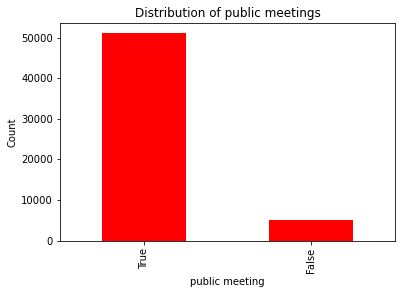

In [134]:
#plotting the categories in the public meeting column
df["public_meeting"].value_counts().plot(kind="bar", color = "r")
plt.xlabel("public meeting")
plt.ylabel("Count")
plt.title("Distribution of public meetings")

There are more pumps built around public meeting areas than not. Since the missing values are 6% of the entire dataset, we cannot drop the missing rows. In this case, knowing that missing data on whether the waterpoint is located near a public meeting is important to know for the stakeholders.

In [135]:
#looking at the unique values in the permit column
df.permit.unique()

array([False, True, nan], dtype=object)

Text(0.5, 1.0, 'Distribution of permits')

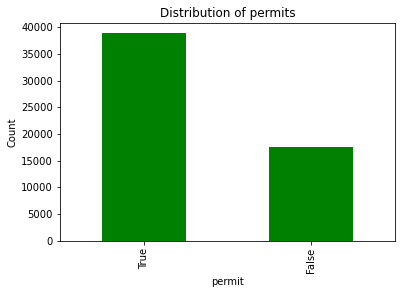

In [136]:
#plotting the categories in the permit column
df["permit"].value_counts().plot(kind="bar", color = "g")
plt.xlabel("permit")
plt.ylabel("Count")
plt.title("Distribution of permits")

There are more pumps with permits than those without. Since the missing values are few and it would be important for stakeholders to
know how permits are distributed across this dataset, we cannot drop the entire column. We can indicate that the data is missing.

In [137]:
#looking at the unique values in the funder column
df["funder"].unique()

array(['Roman', 'Grumeti', 'Lottery Club', ..., 'Dina', 'Brown', 'Samlo'],
      dtype=object)

Since we are interested to know whether which funders provide functional pumps, we cannot drop the entire
column.

In [138]:
#replacing all the missing values with the string 'missing'
df['funder'].fillna(value = "missing", inplace = True)
df['permit'].fillna(value = "missing", inplace = True)
df['public_meeting'].fillna(value = "missing", inplace = True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   funder             59400 non-null  object 
 2   gps_height         59400 non-null  int64  
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   num_private        59400 non-null  int64  
 6   basin              59400 non-null  object 
 7   region             59400 non-null  object 
 8   region_code        59400 non-null  int64  
 9   district_code      59400 non-null  int64  
 10  population         59400 non-null  int64  
 11  public_meeting     59400 non-null  object 
 12  permit             59400 non-null  object 
 13  construction_year  59400 non-null  int64  
 14  extraction_type    59400 non-null  object 
 15  management         59400 non-null  object 
 16  payment            594

The dataset does not have any missing values.

##### Now we can check for duplicates in this dataset

In [140]:
#checking for duplicates
duplicates = df[df.duplicated()]
duplicates

,amount_tsh,funder,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
370,0.0,Government Of Tanzania,0,0.0,-2.000000e-08,0,Lake Victoria,Mwanza,19,6,0,True,True,0,submersible,vwc,never pay,soft,good,insufficient,machine dbh,groundwater,communal standpipe,1
659,0.0,Dwsp,0,0.0,-2.000000e-08,0,Lake Victoria,Shinyanga,17,1,0,missing,False,0,nira/tanira,wug,unknown,soft,good,enough,shallow well,groundwater,hand pump,0
755,0.0,Government Of Tanzania,0,0.0,-2.000000e-08,0,Lake Victoria,Shinyanga,17,1,0,True,False,0,nira/tanira,wug,never pay,soft,good,enough,shallow well,groundwater,hand pump,1
798,0.0,Dwsp,0,0.0,-2.000000e-08,0,Lake Victoria,Shinyanga,17,1,0,missing,False,0,nira/tanira,wug,unknown,soft,good,enough,shallow well,groundwater,hand pump,1
971,0.0,Dwsp,0,0.0,-2.000000e-08,0,Lake Victoria,Shinyanga,17,1,0,missing,False,0,nira/tanira,wug,unknown,soft,good,enough,shallow well,groundwater,hand pump,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,0.0,Dwsp,0,0.0,-2.000000e-08,0,Lake Victoria,Shinyanga,17,1,0,True,False,0,nira/tanira,wug,other,soft,good,enough,shallow well,groundwater,hand pump,0
59208,0.0,Dwsp,0,0.0,-2.000000e-08,0,Lake Victoria,Shinyanga,17,1,0,missing,False,0,nira/tanira,wug,unknown,soft,good,enough,shallow well,groundwater,hand pump,1
59295,0.0,Rwssp,0,0.0,-2.000000e-08,0,Lake Victoria,Shinyanga,17,1,0,True,False,0,nira/tanira,wug,never pay,soft,good,enough,shallow well,groundwater,hand pump,0
59324,0.0,World Vision,0,0.0,-2.000000e-08,0,Lake Victoria,Shinyanga,17,1,0,missing,False,0,nira/tanira,wug,unknown,soft,good,enough,shallow well,groundwater,hand pump,1


There are 1125 rows of duplicates in this dataset that need to be removed.

In [141]:
#deleting duplicates
df.drop_duplicates(keep = "last", inplace = True)

In [142]:
#checking to see if duplicaed values have been deleted
duplicates = df[df.duplicated()]
duplicates

,amount_tsh,funder,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group


We now do not have any duplicated row values.

##### Checking for punctuations and characters in the dataset

In [143]:
#exploring the different categories in the column extraction type column
df.extraction_type.unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'ksb', 'mono', 'windmill', 'afridev', 'other - rope pump',
       'india mark iii', 'other - swn 81', 'other - play pump', 'cemo',
       'climax', 'walimi', 'other - mkulima/shinyanga'], dtype=object)

There are many characters that need to be removed from these two columns

In [144]:
#removing characters from the column
df['extraction_type'] = df['extraction_type'].str.replace('other - ',"", regex=True)

In [145]:
##removing characters from the column
df['extraction_type'] = df['extraction_type'].str.replace('nira/tanira',"tanira", regex=True)

In [146]:
#removing characters from the column
df['extraction_type'] = df['extraction_type'].str.replace('mkulima/shinyanga',"shinyanga", regex=True)

In [147]:
#removing characters from the column
df["extraction_type"].unique()

array(['gravity', 'submersible', 'swn 80', 'tanira', 'india mark ii',
       'other', 'ksb', 'mono', 'windmill', 'afridev', 'rope pump',
       'india mark iii', 'swn 81', 'play pump', 'cemo', 'climax',
       'walimi', 'shinyanga'], dtype=object)

In [148]:
# checking the newly cleaned dataset
df.head()

,amount_tsh,funder,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,Roman,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,109,True,False,1999,gravity,vwc,pay annually,soft,good,enough,spring,groundwater,communal standpipe,1
1,0.0,Grumeti,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,280,missing,True,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,1
2,25.0,Lottery Club,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,250,True,True,2009,gravity,vwc,pay per bucket,soft,good,enough,dam,surface,communal standpipe multiple,1
3,0.0,Unicef,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,58,True,True,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,0
4,0.0,Action In A,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,0,True,True,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,1


There are a few zeros in the construction_year and we can explore that to find out what it means.

In [149]:
#exploring the unique values in the year
df.construction_year.unique()

array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970,
       1995, 2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990,
       1982, 1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994,
       1968, 1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965],
      dtype=int64)

In [150]:
#exploring the column construction year that has zeroes
df.loc[df['construction_year'] == 0]

,amount_tsh,funder,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
4,0.0,Action In A,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,0,True,True,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,1
6,0.0,Dwsp,0,33.362410,-3.766365,0,Internal,Shinyanga,17,3,0,True,True,0,swn 80,vwc,never pay,soft,good,enough,machine dbh,groundwater,hand pump,0
7,0.0,Rwssp,0,32.620617,-4.226198,0,Lake Tanganyika,Shinyanga,17,3,0,True,True,0,tanira,wug,unknown,milky,milky,enough,shallow well,groundwater,hand pump,0
8,0.0,Wateraid,0,32.711100,-5.146712,0,Lake Tanganyika,Tabora,14,6,0,True,True,0,india mark ii,vwc,never pay,salty,salty,seasonal,machine dbh,groundwater,hand pump,0
9,0.0,Isingiro Ho,0,30.626991,-1.257051,0,Lake Victoria,Kagera,18,1,0,True,True,0,tanira,vwc,never pay,soft,good,enough,shallow well,groundwater,hand pump,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,0.0,Concern,0,30.667805,-2.483710,0,Lake Victoria,Kagera,18,30,0,True,False,0,gravity,vwc,never pay,soft,good,insufficient,spring,groundwater,communal standpipe,0
59392,0.0,Government Of Tanzania,0,33.009440,-8.520888,0,Lake Rukwa,Mbeya,12,1,0,True,True,0,gravity,vwc,never pay,soft,good,enough,spring,groundwater,communal standpipe,0
59393,0.0,Private,0,33.866852,-4.287410,0,Internal,Tabora,14,2,0,False,False,0,gravity,private operator,pay per bucket,soft,good,insufficient,dam,surface,other,1
59397,0.0,missing,0,34.017087,-8.750434,0,Rufiji,Mbeya,12,7,0,True,False,0,swn 80,vwc,pay monthly,fluoride,fluoride,enough,machine dbh,groundwater,hand pump,1


As the dataframe above shows, the 0's do not mean that the well was not constructed but rather might probably show that data on year constructed was unavailable for some of these data points perhaps because the waterpoints had been constructed a long time ago. We will leave the Os in the dataset and see if the column will be necessary for modelling during preprocessing.

In [151]:
#exploring the column amount that has zeroes
df.loc[df['amount_tsh'] == 0]

,amount_tsh,funder,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
1,0.0,Grumeti,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,280,missing,True,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,1
3,0.0,Unicef,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,58,True,True,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,0
4,0.0,Action In A,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,0,True,True,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,1
6,0.0,Dwsp,0,33.362410,-3.766365,0,Internal,Shinyanga,17,3,0,True,True,0,swn 80,vwc,never pay,soft,good,enough,machine dbh,groundwater,hand pump,0
7,0.0,Rwssp,0,32.620617,-4.226198,0,Lake Tanganyika,Shinyanga,17,3,0,True,True,0,tanira,wug,unknown,milky,milky,enough,shallow well,groundwater,hand pump,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,0.0,Government Of Tanzania,0,33.009440,-8.520888,0,Lake Rukwa,Mbeya,12,1,0,True,True,0,gravity,vwc,never pay,soft,good,enough,spring,groundwater,communal standpipe,0
59393,0.0,Private,0,33.866852,-4.287410,0,Internal,Tabora,14,2,0,False,False,0,gravity,private operator,pay per bucket,soft,good,insufficient,dam,surface,other,1
59397,0.0,missing,0,34.017087,-8.750434,0,Rufiji,Mbeya,12,7,0,True,False,0,swn 80,vwc,pay monthly,fluoride,fluoride,enough,machine dbh,groundwater,hand pump,1
59398,0.0,Malec,0,35.861315,-6.378573,0,Rufiji,Dodoma,1,4,0,True,True,0,tanira,vwc,never pay,soft,good,insufficient,shallow well,groundwater,hand pump,1


The number of rows with zeros are 40515. This means that 40515  values represent
free water. The zero values make sense. The bigger values in the dataset will be addred when scaling data during the preprocessing stage.

In [152]:
#exploring the zeros in the population column
df.loc[df['population'] == 0]

,amount_tsh,funder,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
4,0.0,Action In A,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,0,True,True,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,1
6,0.0,Dwsp,0,33.362410,-3.766365,0,Internal,Shinyanga,17,3,0,True,True,0,swn 80,vwc,never pay,soft,good,enough,machine dbh,groundwater,hand pump,0
7,0.0,Rwssp,0,32.620617,-4.226198,0,Lake Tanganyika,Shinyanga,17,3,0,True,True,0,tanira,wug,unknown,milky,milky,enough,shallow well,groundwater,hand pump,0
8,0.0,Wateraid,0,32.711100,-5.146712,0,Lake Tanganyika,Tabora,14,6,0,True,True,0,india mark ii,vwc,never pay,salty,salty,seasonal,machine dbh,groundwater,hand pump,0
9,0.0,Isingiro Ho,0,30.626991,-1.257051,0,Lake Victoria,Kagera,18,1,0,True,True,0,tanira,vwc,never pay,soft,good,enough,shallow well,groundwater,hand pump,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,0.0,Concern,0,30.667805,-2.483710,0,Lake Victoria,Kagera,18,30,0,True,False,0,gravity,vwc,never pay,soft,good,insufficient,spring,groundwater,communal standpipe,0
59392,0.0,Government Of Tanzania,0,33.009440,-8.520888,0,Lake Rukwa,Mbeya,12,1,0,True,True,0,gravity,vwc,never pay,soft,good,enough,spring,groundwater,communal standpipe,0
59393,0.0,Private,0,33.866852,-4.287410,0,Internal,Tabora,14,2,0,False,False,0,gravity,private operator,pay per bucket,soft,good,insufficient,dam,surface,other,1
59397,0.0,missing,0,34.017087,-8.750434,0,Rufiji,Mbeya,12,7,0,True,False,0,swn 80,vwc,pay monthly,fluoride,fluoride,enough,machine dbh,groundwater,hand pump,1


This data set shows that there are wells that have 0 populations around them. The high values will be addressed during scaling as well.

In [153]:
#exploring the column num private that has zeroes
df.loc[df['num_private'] == 0]

,amount_tsh,funder,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type,management,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,Roman,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,109,True,False,1999,gravity,vwc,pay annually,soft,good,enough,spring,groundwater,communal standpipe,1
1,0.0,Grumeti,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,280,missing,True,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,1
2,25.0,Lottery Club,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,250,True,True,2009,gravity,vwc,pay per bucket,soft,good,enough,dam,surface,communal standpipe multiple,1
3,0.0,Unicef,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,58,True,True,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,0
4,0.0,Action In A,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,0,True,True,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,Germany Republi,1210,37.169807,-3.253847,0,Pangani,Kilimanjaro,3,5,125,True,True,1999,gravity,water board,pay per bucket,soft,good,enough,spring,groundwater,communal standpipe,1
59396,4700.0,Cefa-njombe,1212,35.249991,-9.070629,0,Rufiji,Iringa,11,4,56,True,True,1996,gravity,vwc,pay annually,soft,good,enough,river,surface,communal standpipe,1
59397,0.0,missing,0,34.017087,-8.750434,0,Rufiji,Mbeya,12,7,0,True,False,0,swn 80,vwc,pay monthly,fluoride,fluoride,enough,machine dbh,groundwater,hand pump,1
59398,0.0,Malec,0,35.861315,-6.378573,0,Rufiji,Dodoma,1,4,0,True,True,0,tanira,vwc,never pay,soft,good,insufficient,shallow well,groundwater,hand pump,1


The number of rows with zeros in this column is 57518. We will drop this column because it was not well described and the data points do not make sense to our analysis.

In [154]:
df.drop("num_private", axis=1, inplace=True)

Since OHE only accepts uniform strings or numbers, the "NaN" string in the permit and 
public meeting columns will not be accepted and have to be manually converted to numerical values.

In [155]:
df["permit"].value_counts()

True       38358
False      16861
missing     3056
Name: permit, dtype: int64

In [156]:
#econverting the different unique categories in these columns to unique values
df["permit"] = df["permit"].map({True:1, False: 0, "missing": 2})
df["public_meeting"] = df["public_meeting"].map({True:1, False: 0, "missing": 2})

### Data Preparation

#### EDA

In [157]:
#finding the shape of our dataset
df.shape

(58275, 23)

After cleaning, our cleaned dataset contains 58275 rows and 23 columns

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58275 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         58275 non-null  float64
 1   funder             58275 non-null  object 
 2   gps_height         58275 non-null  int64  
 3   longitude          58275 non-null  float64
 4   latitude           58275 non-null  float64
 5   basin              58275 non-null  object 
 6   region             58275 non-null  object 
 7   region_code        58275 non-null  int64  
 8   district_code      58275 non-null  int64  
 9   population         58275 non-null  int64  
 10  public_meeting     58275 non-null  int64  
 11  permit             58275 non-null  int64  
 12  construction_year  58275 non-null  int64  
 13  extraction_type    58275 non-null  object 
 14  management         58275 non-null  object 
 15  payment            58275 non-null  object 
 16  water_quality      582

We have 12 non-numerical features and 11 numerical features in this dataset

##### checking outliers and statistics

In [159]:
#checking the statistics of our data
df.describe()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,public_meeting,permit,construction_year,status_group
count,58275.000000,58275.000000,58275.000000,5.827500e+04,58275.000000,58275.000000,58275.000000,58275.000000,58275.000000,58275.000000,58275.000000
mean,323.765471,680.990236,34.720631,-5.813496e+00,15.252578,5.686418,183.345380,0.967344,0.763106,1325.013934,0.543526
std,3026.041797,693.588143,4.646012,2.866771e+00,17.751161,9.712417,475.344394,0.370583,0.534474,943.544423,0.498106
min,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.204719,-8.600268e+00,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,397.000000,34.963537,-5.106074e+00,12.000000,3.000000,30.000000,1.000000,1.000000,1987.000000,1.000000
75%,25.000000,1327.000000,37.206848,-3.352067e+00,17.000000,5.000000,230.000000,1.000000,1.000000,2004.000000,1.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000,30500.000000,2.000000,2.000000,2013.000000,1.000000


We can see that our values are not on the same scale and need to be scaled. Furthermore, checking the minimum and maximum
values of gps_height, amount and population we can see the drastic differences which might indicate the presence
of outliers. However, we should note that the amount column indicates varying amounts paid for water which can range depending on annual, monthly or per bucket, therefore the extreme amounts do not necessarily indicate outliers. Furthermore, populations also differ and the population  value of 30500 might not be an outlier.

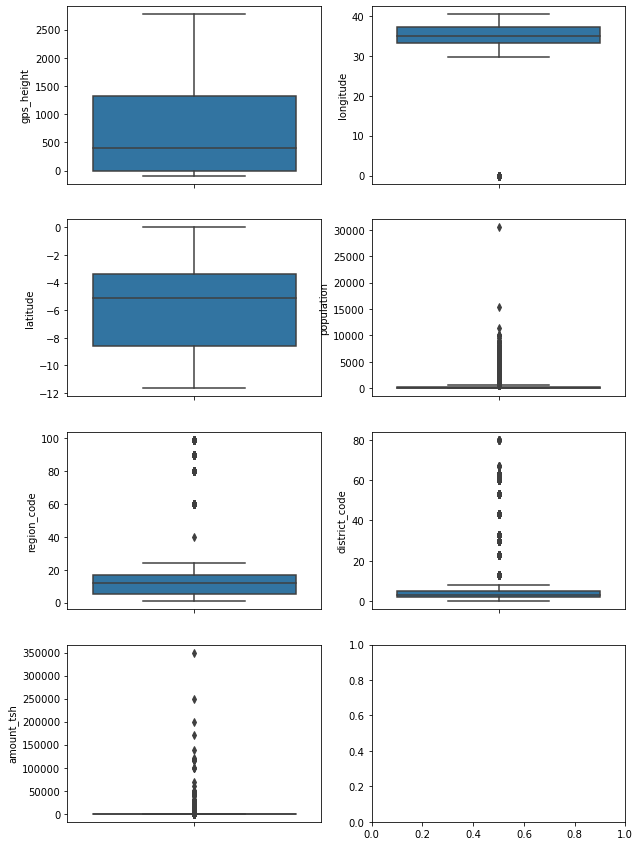

In [160]:
#creating boxplots to explore presence of outliers in these columns
columns = ["gps_height", "longitude", "latitude", "population",
           "region_code","district_code", "amount_tsh"]
fig, ax = plt.subplots (ncols = 2, nrows = 4, figsize = (10, 15))
index = 0
ax = ax.flatten()

for col in df[columns]:
    sns.boxplot(y = col, data = df, ax=ax[index])
    index += 1

There are ouliers in district_code, population, amount_tsh, longitude and num_private. These can be 
addressed in preprocessing through normalization.

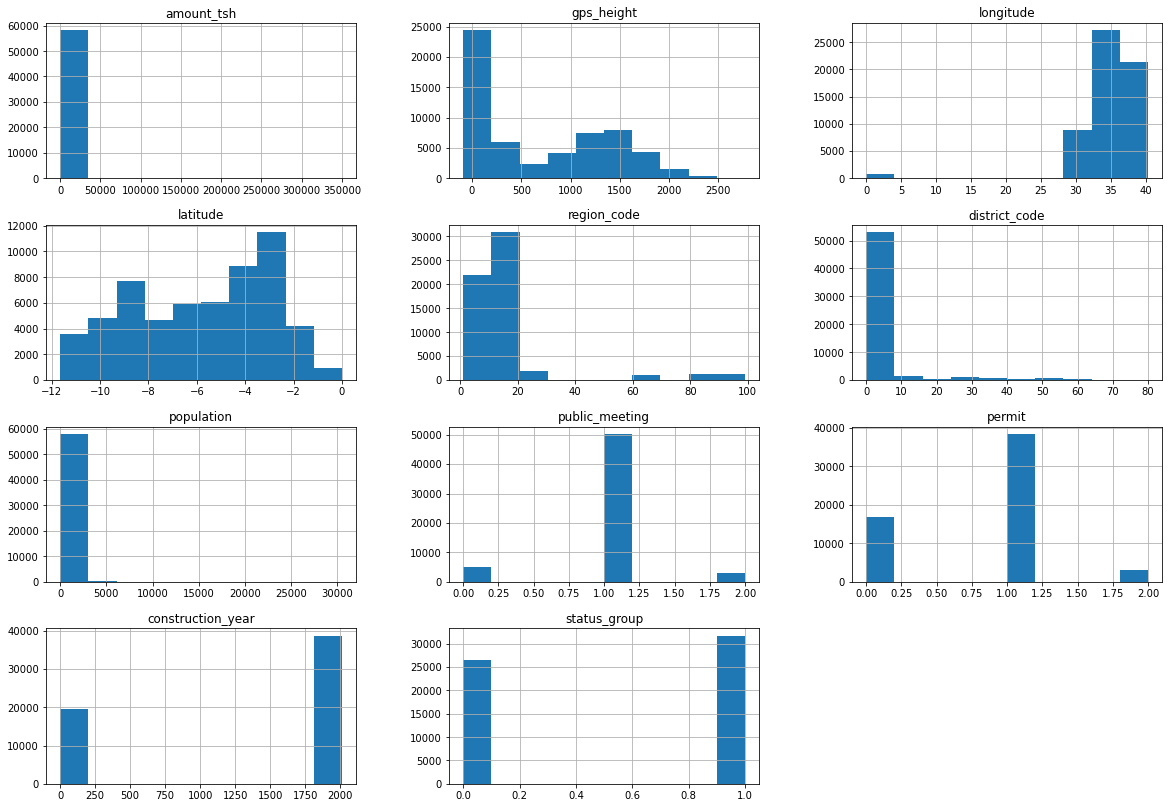

In [161]:
#distributions of columns
# df.hist(bins=50, figsize=(20,12))

# plt.show()
df.hist(figsize = [20,14]);

The distribution graphs show that non of our continous variables is normally distributed. Furthermore, 
they also highlight the categorical variables as status_group, payment, quality groupy and quantity.

##### What is the distribution of good condition (functional) water pumps against those that are in poor condition?

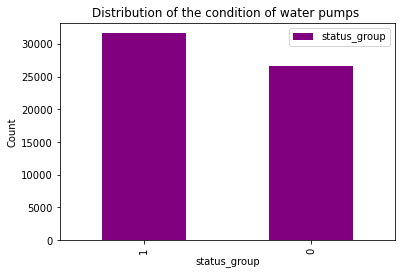

In [162]:
#checking the distribution of water pumps functionality using bar plots
df["status_group"].value_counts().plot(kind="bar", color = "purple")
plt.xlabel("status_group")
plt.ylabel("Count")
plt.title("Distribution of the condition of water pumps ")
plt.legend()

In [163]:
print(df.status_group.value_counts())
print(df.status_group.value_counts(normalize=True))

1    31674
0    26601
Name: status_group, dtype: int64
1    0.543526
0    0.456474
Name: status_group, dtype: float64


Pumps that are functional are more than those that are not functional but the marginal difference is small. Therefore, NGOs need to invest more funds in better water infrastructure and in repairing non-functional water pumps. As we can see from the class imbalance, the difference between functional and 
non functional pumps is around 10%.

##### water quality(clean versus unclean)

In [164]:
#exploring the different categories of the quality of water accessed to the population
df.quality_group.value_counts()

good        49908
salty        5115
unknown      1742
milky         804
colored       489
fluoride      217
Name: quality_group, dtype: int64

We can see that water quality is either good or salt, milky, colored, flouride and unknown. The other categories apart from good
do not show presence of healthy and clean water that can be used for consumption.

Text(0.5, 1.0, 'Distribution of water quality')

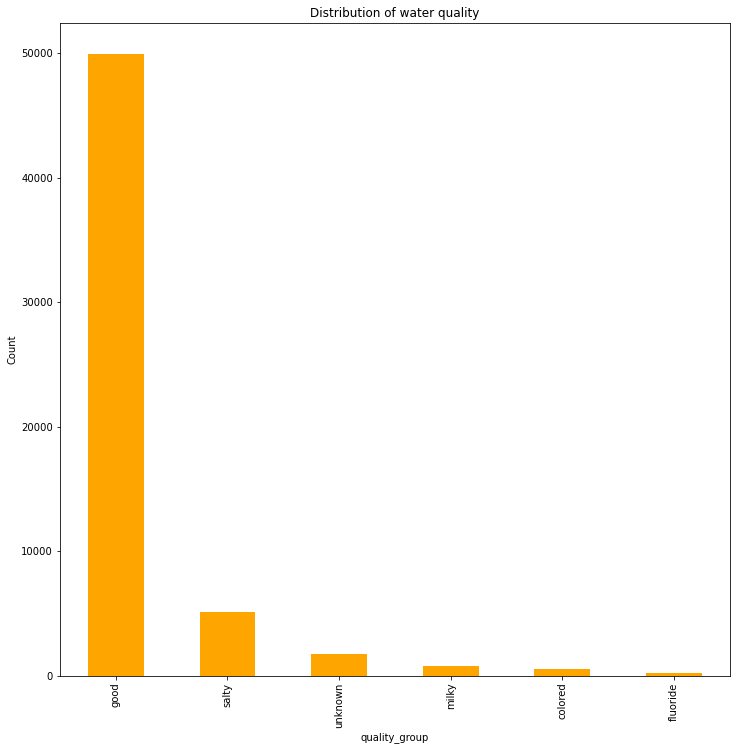

In [165]:
#checking the distribution of water quality using bar plots
df["quality_group"].value_counts().plot(kind="bar", color = "orange", figsize=(12, 12))
plt.xlabel("quality_group")
plt.ylabel("Count")
plt.title("Distribution of water quality")

The graph above shows that majority of the pumps provide good clean water that is safe for drinking while those that have
milky, colored, salty or water that has not been tested is a low proportion of all the pumps. Despite the small proportion,this
water is still being accessed by people and is dangerous for their consumption, hence this needs to be corrected to ensure access to clean water for all.

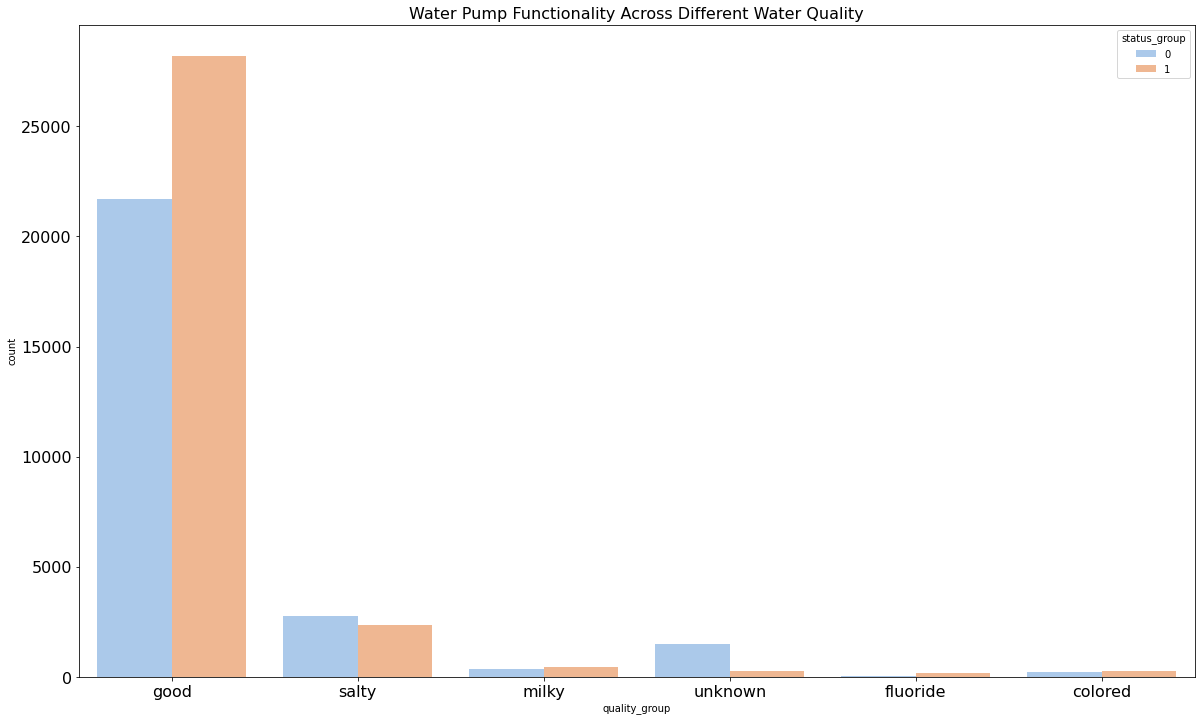

In [222]:
#displaying the distribution of water pumps functionality across water quality using bar plots
plt.figure(figsize=[20,12])

ax = sns.countplot(x="quality_group", hue="status_group", data=df, palette='pastel')
plt.title("Water Pump Functionality Across Different Water Quality", size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.savefig("quality.jpg")

From the stacked graph above, we can learn that good is mostly served from more functional
pumps compared to salty, colored and unknown water quality types.

##### The Quantity of water

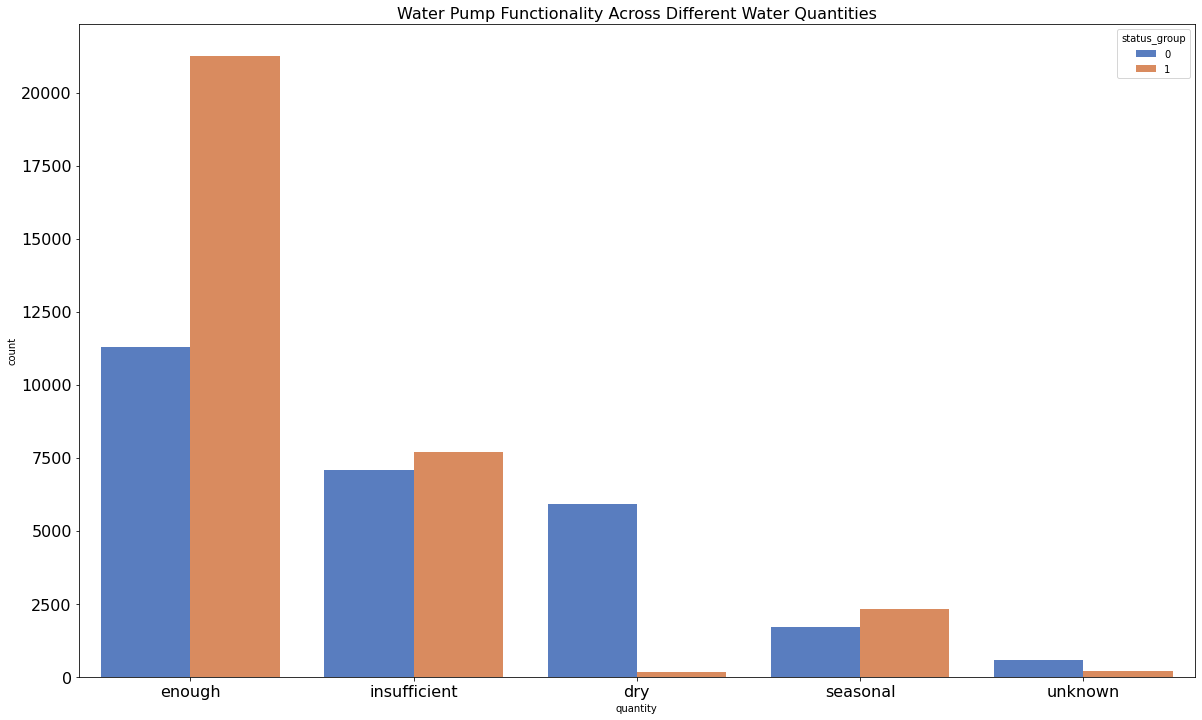

In [223]:
#displaying the distribution of water pumps functionality across water quantity using bar plots
plt.figure(figsize=[20,12])
ax = sns.countplot(x="quantity", hue="status_group", data=df, palette='muted')
plt.title("Water Pump Functionality Across Different Water Quantities", size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.savefig("quantity.jpg")

Areas with dry quantity seem to have more unfunctional pumps and those with enough seem to have pumps
with functional pumps.

##### The cost of water: Is it too expensive too access water?

In [167]:
#exploring unqiue categories in payment column
df.payment.value_counts()

never pay                24738
pay per bucket            8968
pay monthly               8272
unknown                   7797
pay when scheme fails     3886
pay annually              3634
other                      980
Name: payment, dtype: int64

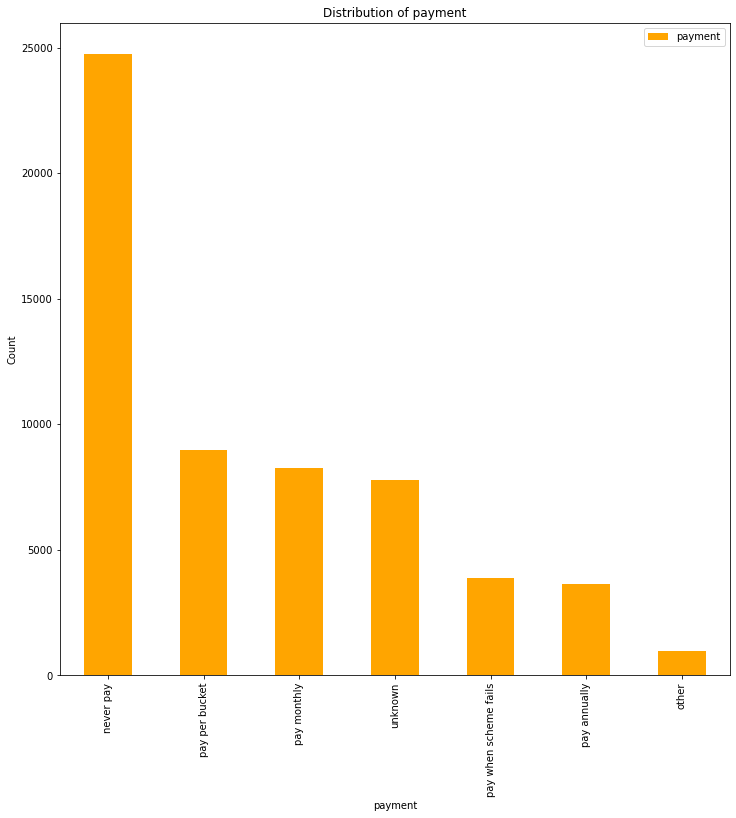

In [168]:
#displaying the distribution of payment schemes using bar plots
df["payment"].value_counts().plot(figsize = [12,12], kind="bar", color = "orange")
plt.xlabel("payment")
plt.ylabel("Count")
plt.title("Distribution of payment")
plt.legend()

As the graph shows, most people do not pay to access water. Others pay either per bucket, monthly, annually or when the scheme fails. Despite this, it is important that NGOs look towards democratizing access to water more by making it free or really subdizing the payment.

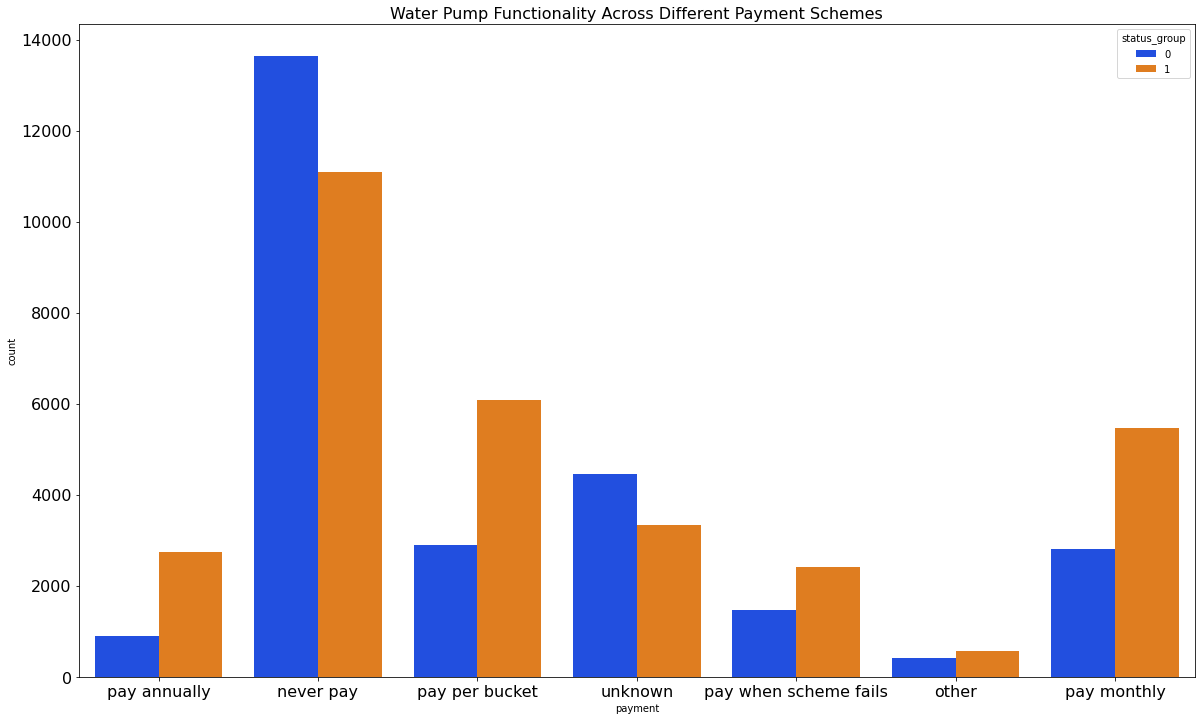

In [227]:
#displaying the distribution of water pumps functionality across payment schemes using bar plots
plt.figure(figsize=[20,12])
ax = sns.countplot(x="payment", hue="status_group", data=df, palette='bright')
plt.title("Water Pump Functionality Across Different Payment Schemes", size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.savefig("payment.jpg")

The conditions of the pumps varies across different payment schemes. Those not paying and unknown
payments seem to have more non functional pumps. This could be because they are accessed by more people
compared to those that require payment.

##### Common types of waterpoint infrastructures

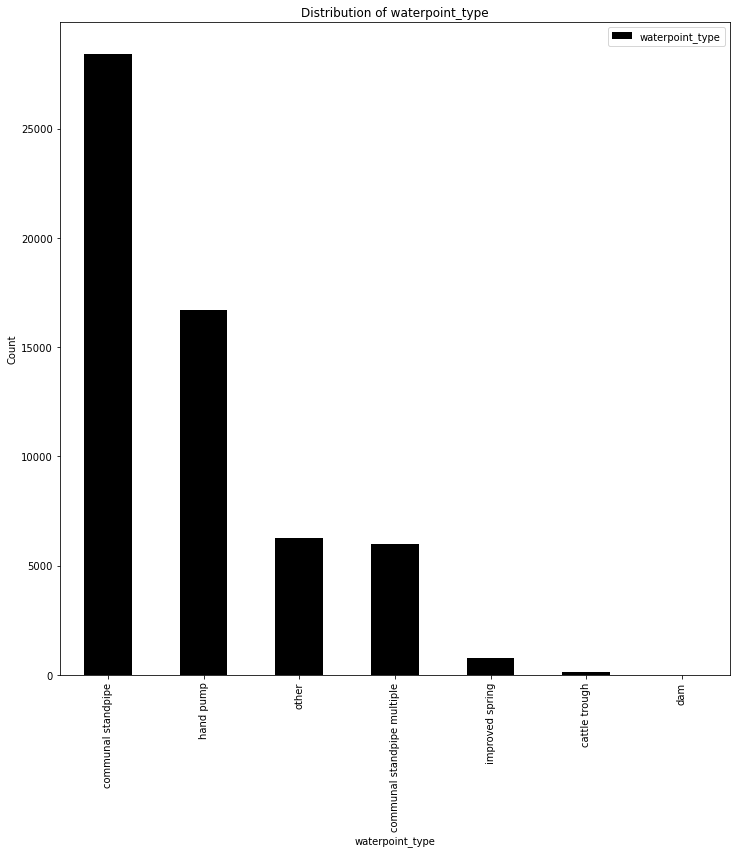

In [49]:
#checking the most common waterpoint types
df["waterpoint_type"].value_counts().plot(figsize = [12,12], kind="bar", color = "black")
plt.xlabel("waterpoint_type")
plt.ylabel("Count")
plt.title("Distribution of waterpoint_type")
plt.legend()

The most common waterpoint type built is the communal standpipe, followed by the handpipe. This information can inform stakeholders
about the common type of water infrastructures that are built in the communities.

##### Is there a type of water pump that is more durable than the rest?

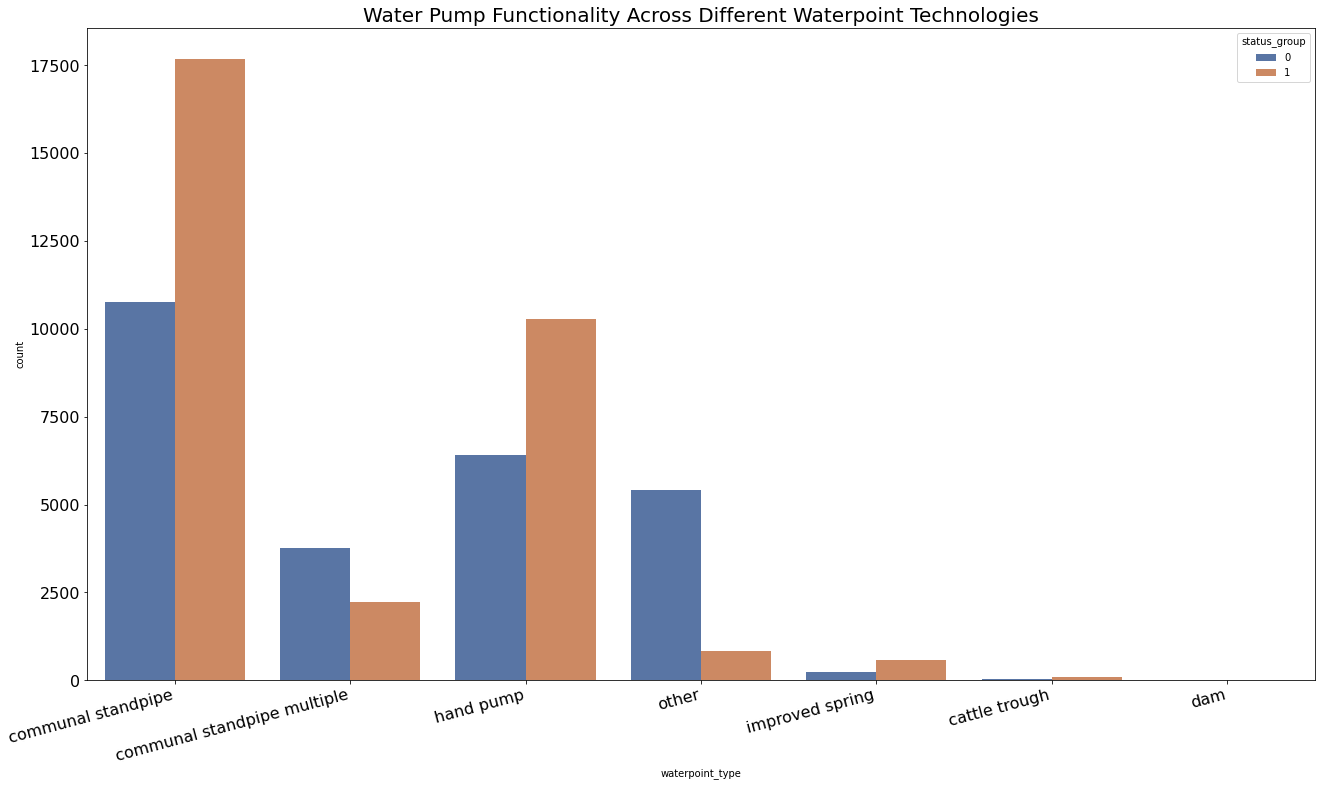

In [228]:
#displaying the distribution of water pumps functionality across water point technologies using bar plots
plt.figure(figsize=[22,12])
ax = sns.countplot(x="waterpoint_type", hue="status_group", data=df, palette= "deep")
plt.title("Water Pump Functionality Across Different Waterpoint Technologies", size=20)
plt.xticks(size=16, rotation = 15, ha="right")
plt.yticks(size=16)
plt.savefig("waterpointtype.jpg")

What this graph shows is that the communal standpipe and handpump seem to have more functional waterpumps
than unfunctional ones. The improvised spring, communal standpipe multiple and other types seem to 
have more unfunctional pumps than functional. NGOs should therefore choose the communal standpipe and hand pump
as they seem to be more durable. This is convinient because they are also the most commonly used.

##### Does scheme management affect the water point functionality?

Text(0.5, 1.0, 'Water Pump Functionality Across Different Management Schemes')

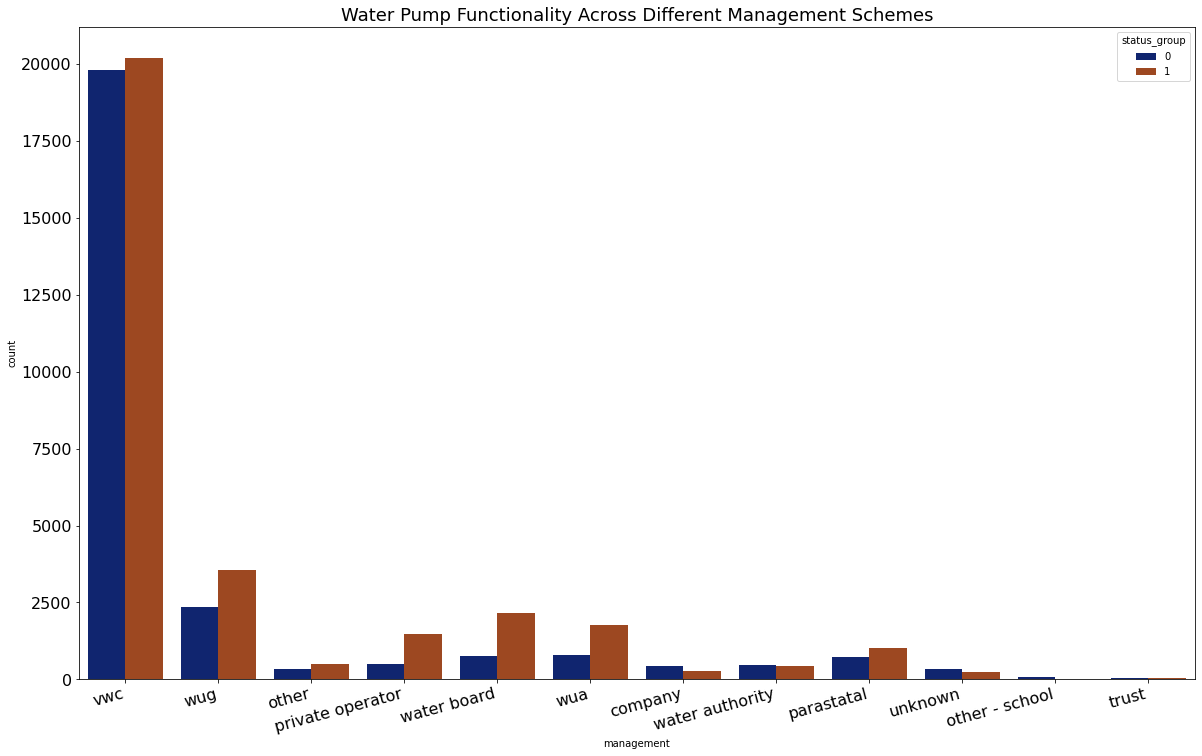

In [229]:
#displaying the distribution of water pumps functionality across scheme managements using bar plots
plt.figure(figsize=[20,12])
ax = sns.countplot(x="management", hue="status_group", data=df, palette= "dark")
plt.xticks(size=16, rotation = 15, ha="right")
plt.yticks(size=16)
plt.title("Water Pump Functionality Across Different Management Schemes", size=18)

VWC which is a private management organization in Tanzania seems to manage most of the waterpoints in
the country.Pumps management by vmc, wug, private sectors, parastatals and water boards seem to be more functional than those managed by companies, water authorities and schools.

##### Is quantity of water from pumps sufficient?

Once again I will create a binary classification where 1 represents enough water and 0 represents water that is insufficient, 
dry, seasonal and unknown.

In [52]:
df.quantity.value_counts()

enough          32572
insufficient    14795
dry              6086
seasonal         4034
unknown           788
Name: quantity, dtype: int64

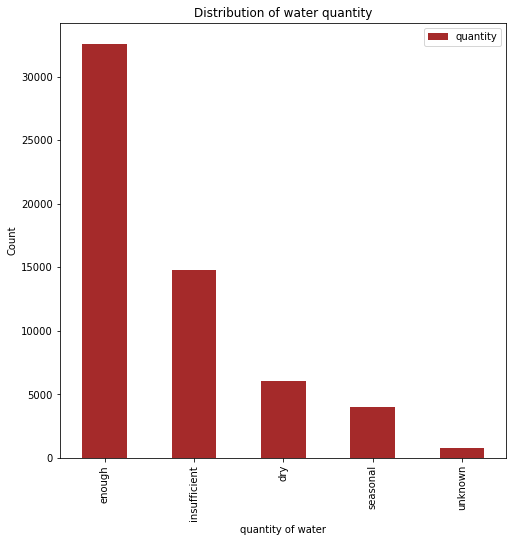

In [53]:
#displaying the distribution of water quantity categories using bar plots
df["quantity"].value_counts().plot(figsize = [8,8], kind="bar", color = "brown")
plt.xlabel("quantity of water")
plt.ylabel("Count")
plt.title("Distribution of water quantity")
plt.legend()

A lot of regions show that water is sufficient. The count of pumps with insufficient water combined(insufficient, dry, seasonal and unknown) also reporting high count. NGOs should pay 
close attention and effectively address this.

##### Who are our Top Funders that provide Functional Pumps

In our target variable 1 represents functional pumps, 0 represents unfunctional pumps. We would want
to know who are our top funders who provide functional pumps (1).

In [54]:
#exploring the top five funders or installers of water pumps
top_funders = pd.DataFrame(df.groupby("funder")["status_group"].sum().sort_values(ascending=False).head(5))
top_funders

,status_group
funder,
Government Of Tanzania,3675
missing,1979
Danida,1713
Hesawa,838
Rwssp,728


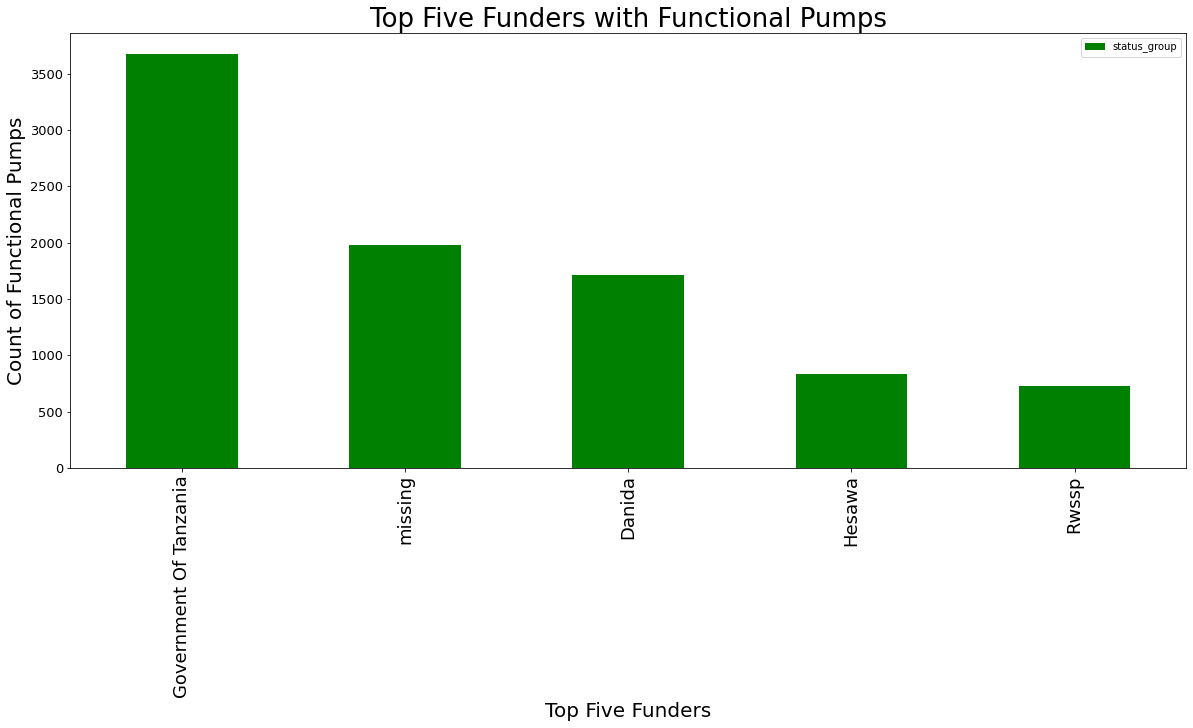

In [55]:
ax = top_funders.plot(kind='bar', figsize=(20,8), color="green", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Top Five Funders with Functional Pumps", fontsize=26)
ax.set_ylabel("Count of Functional Pumps", fontsize=20);
ax.set_xlabel("Top Five Funders", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("output.jpg")
plt.show()

The top funders who provide functional pumps are the Government of Tanzania,
Unknown funders
Danida[Danish Company], 
Hesawa[Swedish and Tanzanian programme], 
RWssp [Indian Company].


##### Extraction Types 

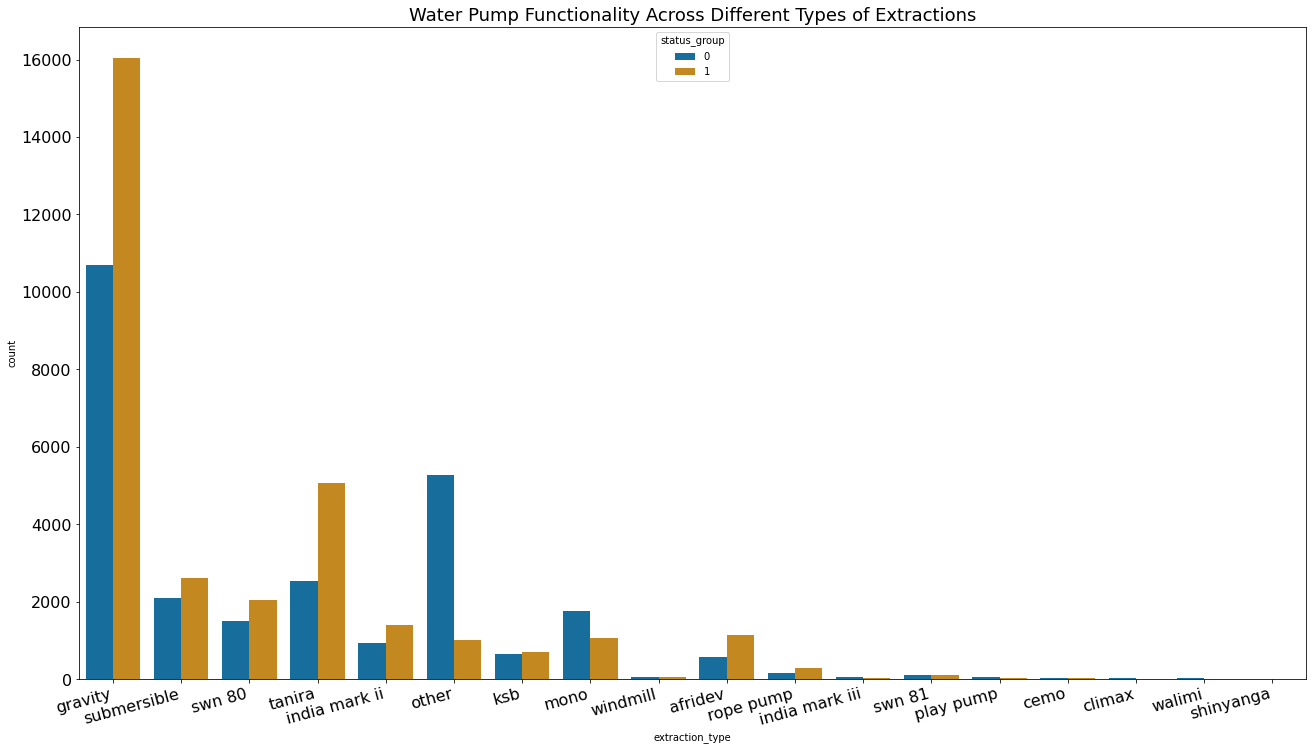

In [231]:
plt.figure(figsize=[22,12])
ax = sns.countplot(x="extraction_type", hue="status_group", data=df, palette= "colorblind")
plt.xticks(size=16, rotation = 15, ha="right")
plt.yticks(size=16)
plt.title("Water Pump Functionality Across Different Types of Extractions", size=18)
plt.savefig("extractiontype.jpg")

The extraction type gravity, submersive, swn80 and tanira seem to have more functional pumps than unfunctional pumps. It makes sense that gravity pumps are used because they are the most durable and environmental friendly pumps (sustainable) as they harness energy from the body of water where they have been installed.

Text(0.5, 1.0, 'Water Pump Functionality Across Different Classes of Water Sources')

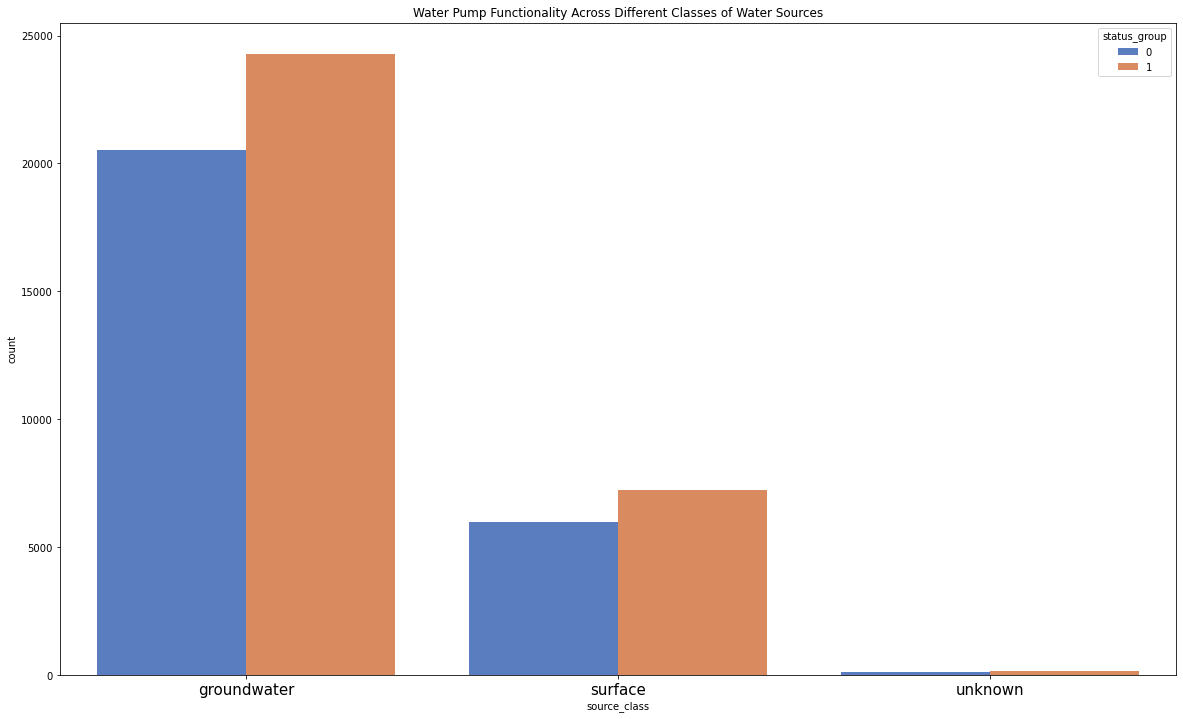

In [232]:
#displaying the distribution of water pumps functionality across different water sources using bar plots
plt.figure(figsize=[20,12])
ax = sns.countplot(x="source_class", hue="status_group", data=df, palette= "muted")
plt.title("Water Pump Functionality Across Different Classes of Water Sources")

Groundwater and surface as  source classes show slighly more functional pumps compared to unfunctional
pumps.

Functional pumps seem to have more populations around than non-functional pumps. Perhaps this could be
because non-functional pumps do not work and therefore cannot help communities with water.

##### Pump functionality Across Different Basin Types

Text(0.5, 1.0, 'Water Pump Functionality Across Different Basins')

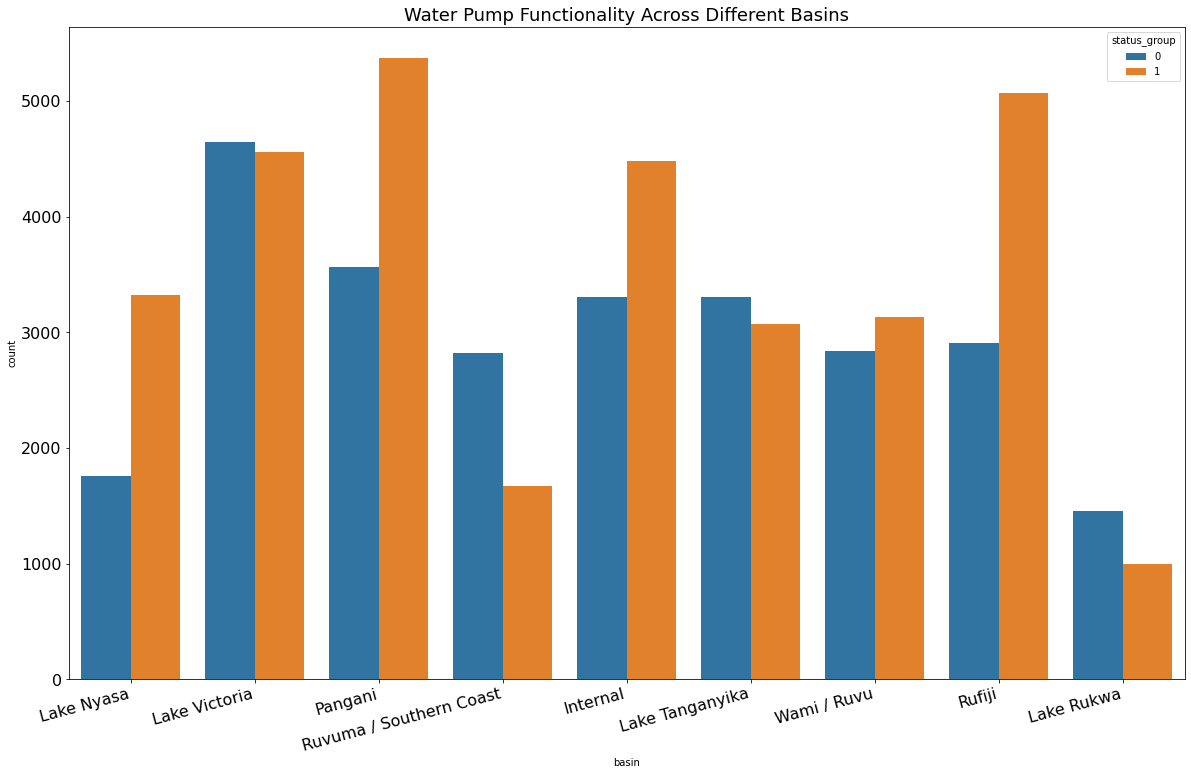

In [235]:
#displaying the distribution of water pumps functionality across  different basins using bar plots
plt.figure(figsize=[20,12])
ax = sns.countplot(x="basin", hue="status_group", data=df)
plt.xticks(size=16, rotation = 15, ha="right")
plt.yticks(size=16)
plt.title("Water Pump Functionality Across Different Basins", size=1)

Pangani, Lake Nyasa, Internal basin and Rufiji basins seem to feed more functional than non functional pumps. Lake Rukwa, Tanganyika and Victoria seem to have more non functional pumps compared to functional. NGOs
might want to know whether the basin types affects the condition of these water pumps.

###### Pump Functionality Across Different Regions

Text(0.5, 1.0, 'Water Pump Functionality Across Different Regions')

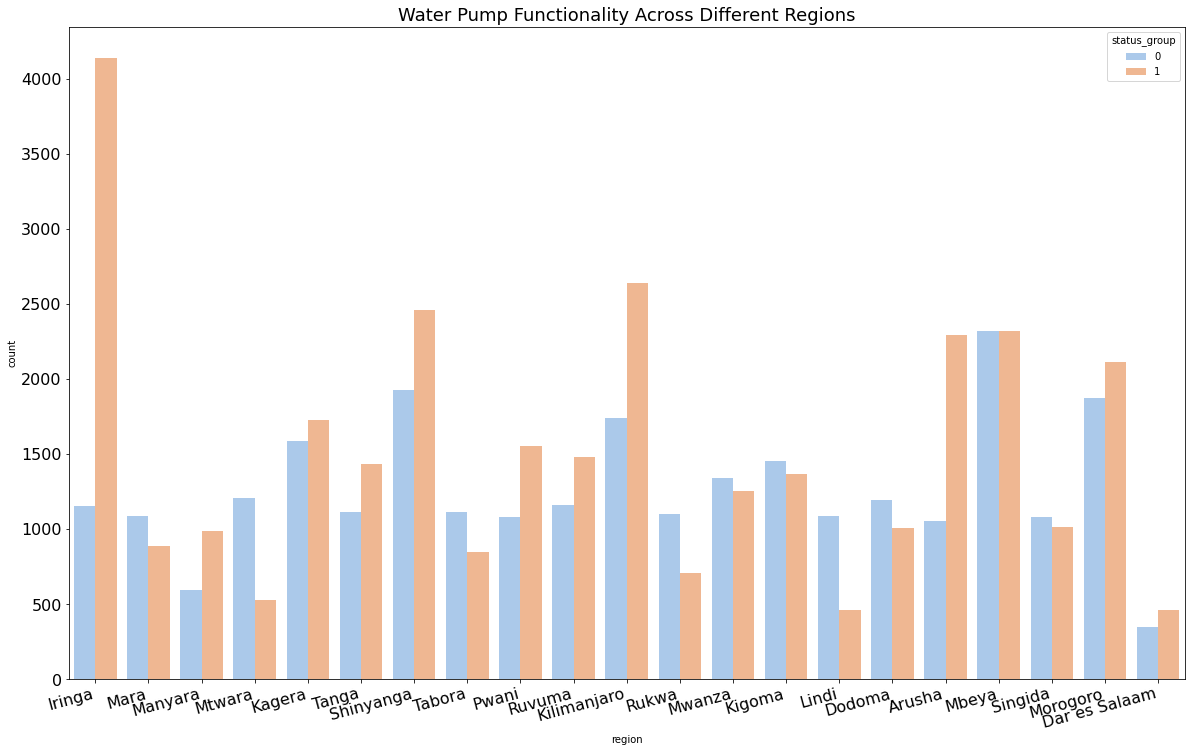

In [234]:
#displaying the distribution of water pumps functionality across different regions using bar plots
plt.figure(figsize=[20,12])
ax = sns.countplot(x="region", hue="status_group", data=df, palette="pastel")
plt.xticks(size=16, rotation = 15, ha="right")
plt.yticks(size=16)
plt.title("Water Pump Functionality Across Different Regions", size=18)

Iringa, Kilimanjaro, Tanga, Arusha and Shinyanga seem to be the regions that have more functional water pumps than 
others. Dodoma, Rukwa, Mtwara and Lindi seem to have more pumps that do not function.

In Tanzania, urban centers include; Arusha, Dar es Salaam, Dodoma, Mwanza and Mtwara. Therefore, functional
pumps are found both in urban and rural areas and unfunctional pumps can also be found in urban and rural
areas. There are no differences between functionality of pumps across urban and rural areas.

<AxesSubplot:>

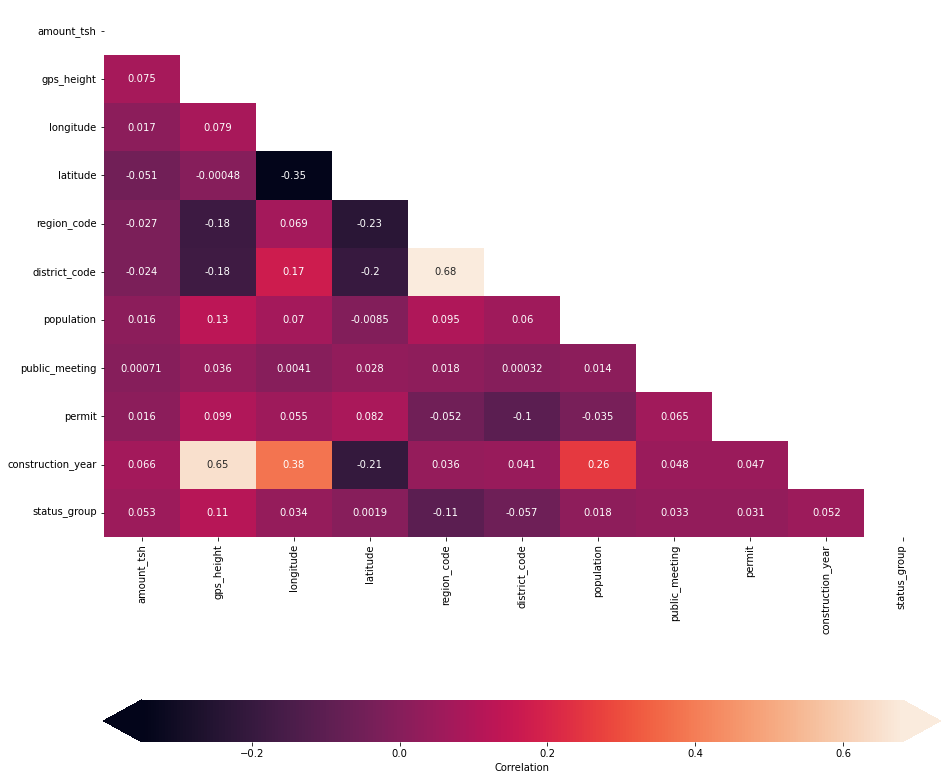

In [60]:
#checking for multicollinearity
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax, annot=True,  
        cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"})

There is low multicollinearity between the independent features.

###### First Feature selection

Based on domain knowledge, we will drop a few unnecessary features before preprocessing. Funder, subvillage and region will be dropped 
as we have enough information on location through codes and the recent of the columns and not necessary for modelling. Furthermore, when it comes to geographical location, NGOs cannot change the locations of water pumps as all people regardless of whether they are need water and hence factors in relation to geography do not help our analysis. Payment will be dropped because it provides similar information to amount in tshs which has now been binned.

In [61]:
#dropping unnecessary columns
df.drop(columns=["funder", "basin", "region", "construction_year", 
                 "gps_height", "longitude", "latitude", "region_code","payment", "district_code"], axis=1, inplace=True)

#### Data Preprocessing

##### Checking the distribution of the target variable: Class Imbalance

###### Train_test_split

First step will be to split our data into the training and test sets to reduce data leakage if the split was to be done later after preprocessing.

In [62]:
#assigning X and y variables by splitting df
y = df["status_group"]
X = df.drop("status_group", axis=1)
#performing train_test_Split with random_state=23 for reproducibility and test_size=0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

In [63]:
#displaying the X_train first five rows after split
X_train.head()

,amount_tsh,population,public_meeting,permit,extraction_type,management,water_quality,quality_group,quantity,source,source_class,waterpoint_type
27850,0.0,0,1,0,gravity,vwc,soft,good,enough,spring,groundwater,communal standpipe multiple
33923,0.0,0,1,0,afridev,wug,salty,salty,insufficient,shallow well,groundwater,hand pump
33731,0.0,0,1,0,gravity,vwc,soft,good,enough,spring,groundwater,other
18238,0.0,0,1,1,other,private operator,milky,milky,insufficient,shallow well,groundwater,other
34717,0.0,1,1,1,gravity,company,soft,good,insufficient,spring,groundwater,communal standpipe


In [64]:
#displaying the X_test first five rows after split
X_test.head()

,amount_tsh,population,public_meeting,permit,extraction_type,management,water_quality,quality_group,quantity,source,source_class,waterpoint_type
49229,25.0,80,1,1,submersible,water board,soft,good,enough,machine dbh,groundwater,communal standpipe
15147,0.0,0,1,2,gravity,vwc,soft,good,insufficient,spring,groundwater,communal standpipe
34593,0.0,1,1,1,afridev,vwc,soft,good,enough,machine dbh,groundwater,hand pump
26699,0.0,0,1,1,swn 80,vwc,soft,good,seasonal,machine dbh,groundwater,hand pump
53792,0.0,1,1,1,other,vwc,soft,good,insufficient,shallow well,groundwater,other


##### Ohe Hot Encoding

To ensure that all our categorical variables are of a numerical datatype so as to be able to build 
a model, we use OHE.

In [65]:
#Transforming categorical variables

#instantiating ohe
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

#columns to be transformed
categoricals = ["water_quality", "source", "source_class", "management", 
                "waterpoint_type", "extraction_type", "quality_group", "quantity"]

# Fit encoder on training set
ohe.fit(X_train[categoricals])

#names of new transformed columns
categorical_ohe_names = ohe.get_feature_names(input_features = categoricals)


#fitting and transforming the categorical variables in the testing data
X_train_ohe = pd.DataFrame(ohe.transform(X_train[categoricals]), 
                           columns = categorical_ohe_names, index=X_train.index)

X_train = pd.concat([X_train.drop(categoricals, axis=1), X_train_ohe], axis=1)
X_train

C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amount_tsh,population,public_meeting,permit,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,...,extraction_type_other,extraction_type_play pump,extraction_type_rope pump,extraction_type_shinyanga,extraction_type_submersible,extraction_type_swn 80,extraction_type_swn 81,extraction_type_tanira,extraction_type_walimi,extraction_type_windmill,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
27850,0.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33923,0.0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
33731,0.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18238,0.0,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34717,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17521,0.0,5000,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31945,4000.0,240,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18626,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10331,0.0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [66]:
#transforming test data
X_test_ohe = pd.DataFrame(ohe.transform(X_test[categoricals]),
                           columns=categorical_ohe_names, index=X_test.index)

# Replace testing columns with transformed versions
X_test = pd.concat([X_test.drop(categoricals, axis=1), X_test_ohe], axis=1)

X_test

,amount_tsh,population,public_meeting,permit,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,...,extraction_type_other,extraction_type_play pump,extraction_type_rope pump,extraction_type_shinyanga,extraction_type_submersible,extraction_type_swn 80,extraction_type_swn 81,extraction_type_tanira,extraction_type_walimi,extraction_type_windmill,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
49229,25.0,80,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15147,0.0,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34593,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26699,0.0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53792,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16300,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1797,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13757,0.0,40,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12374,200.0,120,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
#Normalizing the data

# Instantiate StandardScaler
scaler = StandardScaler()
# Fit and transform X_t
X_train_scaled = scaler.fit_transform(X_train)
        # Transform X_val
X_test_scaled = scaler.transform(X_test)

### Modelling

We will try to use different algorithms including logistic regression, decision trees, and random forest
to get the best algorithm and parameters for our model.

In this classification problem, recall is extremely important. This is because, NGOs; the stakeholders are keen on identifying non_functional waterpoints to have them quickly repaired to ensure that people continue to access water. Even if precision is low, and some wells are identified as non_function when they are functional, it will still save people from catching diseases from poor sanitation and from starvation and low development.

##### Logistic Regression

We will create several models, each model will have a vanilla model and a tuned one to see if there is any
improvement. Log loss will be used as a measure to check how better or worse our model gets.

In [68]:
#creating our first vanilla logistic model using the default parameters

#instantiating the logistic regression classifier
baseline_log_model = LogisticRegression(random_state=23)


baseline_neg_log_loss_cv = cross_val_score(baseline_log_model, X_train_scaled, y_train, 
                                           scoring="neg_log_loss", cv=5)

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.5317405362487768

This is a large log loss for our model. However, this is good start for our vanilla model and it can be improved with different iterations. We hope to improve on log loss of 0.53 with a hyperparameter tuning.

In [69]:
#exploring the baseline model's rsquared
base_R_squared = cross_val_score(baseline_log_model, X_train_scaled, y_train, cv=5).mean()
base_R_squared


0.7304375804375803

The R-squared is 73% but can be also be improved.

In [70]:
#checking different metrics based on the fitted baseline model
log_base_model = baseline_log_model.fit(X_train_scaled, y_train)

preds = log_base_model.predict(X_test_scaled)
probs = log_base_model.predict_proba(X_test_scaled)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  0.5283569327998642
accuracy:  0.7375375375375376
precision: 0.7056755399296836
recall:    0.8871349644830308


As we can see, our baseline model has an accuracy of 73% which can be improved further through tuning the 
hyperparameters and using SMOTE, as well as trying different models.

We also have a precision of 70% and recall of 89%. The test data log loss is 0.54.

In [71]:
#finding mean squared error scores to see whether the model is overfitted
y_train_pred = log_base_model.predict(X_train_scaled)
y_test_pred = log_base_model.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.26846846846846845
Test MSE: 0.26246246246246246


In [72]:
#printing the classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.56      0.66      5320
           1       0.71      0.89      0.79      6335

    accuracy                           0.74     11655
   macro avg       0.76      0.72      0.72     11655
weighted avg       0.75      0.74      0.73     11655



Our test and train mean squared errors are not very different hence our model does not indicate as if 
it is overfitted. The recall scores are not that great but not bad either but can stand to be improved.

##### Correcting class Imbalance

In [73]:
#exploring the class imbalances in the target variable
print(df.status_group.value_counts())
print(df.status_group.value_counts(normalize=True))

1    31674
0    26601
Name: status_group, dtype: int64
1    0.543526
0    0.456474
Name: status_group, dtype: float64


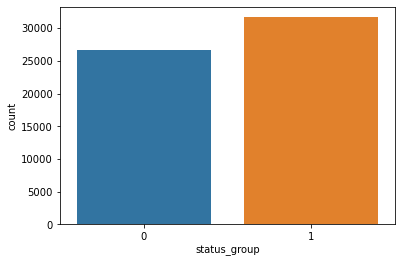

In [74]:
#displaying the class imbalances on a graph
ax = sns.countplot(x='status_group', data=df)
plt.show()

Although commonly negative classes tend to be more than positive in this case, the functional (positive)
are more than negatives. The class imbalance needs to be corrected. If we had a model that indicated the waterpoint was functional, the model would be accurate 54% of the time.

In [75]:
# #Using SMOTE to remove class imbalances

sm = SMOTE(random_state=23)
# Fit and transform X_t_scaled and y_t using sm
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_scaled, y_train)

In [76]:
#fitting oversampled data to our basic model
smote_log_model = LogisticRegression(random_state=23)
smote_neg_log_loss_cv = cross_val_score(smote_log_model, X_train_oversampled, y_train_oversampled, 
                                           scoring="neg_log_loss", cv=3)

smote_log_loss = -(baseline_neg_log_loss_cv.mean())
smote_log_loss

0.5317405362487768

Our smote log loss is similar to our baseline log loss. We will try to tune our model using varying hyperparameters using GridSearchCV and see
if our model log loss can decrease.

In [77]:
#creating a pipeline
#Instantiating scalar and linear regression classes
pipe = Pipeline([('scaler', StandardScaler()),
                     ('lg', LogisticRegression(random_state=23))])


In [78]:
#creating the grid
lg_param_grid = [{
    'lg__penalty': ['none', "l1", "l2", 'elasticnet'],
    'lg__C': [1.0, 1e3, 1e5],
    'lg__class_weight': [{1: 0.28}],
    'lg__max_iter':[1000],
    'lg__solver': ["liblinear", "sag", "saga", "lbfgs"]}]



In [79]:
# Define a grid search
lg_gridsearch = GridSearchCV(estimator=pipe, 
                          param_grid=lg_param_grid, 
                          scoring='recall', 
                          cv=5)

In [80]:
# Fit the training data
lg_gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
lg_gridsearch.score(X_test, y_test)

C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting 

0.2048934490923441

The accuracy score of the train dataset after tuning the parameters is 20.4%. This is a terrible score. Compared to the baseline recall score, this score is much worse.

In [81]:
#model's best recall score
lg_gridsearch.best_score_

0.21386077703212628

In [82]:
#finding the best parameters of the tuned model
lg_gridsearch.best_params_

{'lg__C': 1.0,
 'lg__class_weight': {1: 0.28},
 'lg__max_iter': 1000,
 'lg__penalty': 'l2',
 'lg__solver': 'liblinear'}

In [83]:
#calculating the log loss with the best parameters
grid_log_model = LogisticRegression(random_state=23, C= 1.0, class_weight= {1: 0.28}, 
                                      max_iter= 1000, solver='liblinear')
grid_log_model_loss_cv = cross_val_score(grid_log_model, X_train_scaled, y_train, 
                                           scoring="neg_log_loss", cv=5)

grid_log_model_loss = -(grid_log_model_loss_cv.mean())
grid_log_model_loss

0.6832583843878686

The log loss has increased compared to the baseline model. Therefore the baseline model is the better 
model.

In [84]:
#calculating different metrics for test data
grid_model = grid_log_model.fit(X_train_scaled, y_train)
preds = grid_model.predict(X_test)
probs = grid_model.predict_proba(X_test)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  4.700130183962427
accuracy:  0.567996567996568
precision: 0.597714972940469
recall:    0.6276243093922652


C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [85]:
# Check the AUC for predictions

y_pred_lg = grid_model.predict(X_test_scaled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_lg)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.56


C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Comparing the baseline logistic model with the tuned one, the tuned model has a higher log loss, lower accuracy, precision and recall. Therefore the better logistic model is the baseline model. This means that our lowest log loss for logistic model is 0.53 and highest accuracy is 73%.

In [86]:
#checking the classification report
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51      5320
           1       0.60      0.63      0.61      6335

    accuracy                           0.57     11655
   macro avg       0.56      0.56      0.56     11655
weighted avg       0.57      0.57      0.57     11655



The tuned model has a low recall and even poor prediction capability. Therefore, at the end of this first 
algorithm analysis, the baseline model is doing much better, this is due to a better recall score and lower log loss.

##### Decision Trees

###### vanilla decision tree model

In [87]:
#creating a baseline decision tree model
baseline_DT_model = DecisionTreeClassifier(random_state=23)
baseline_neg_DT_loss_cv = cross_val_score(baseline_DT_model, X_train_oversampled, y_train_oversampled, 
                                           scoring="neg_log_loss", cv=5)

baseline_DT_loss = -(baseline_neg_DT_loss_cv.mean())
baseline_DT_loss

4.223996142330771

This baseline log loss for the decision tree model is 4.22 much worse than the one for the best logistic model which stands at 0.53. We will try to tune the decision tree model with different
hyper parameters. We will try to reduce model complexity by inputting low max_depth values.

In [88]:
# creating a pipeline
dt_scaled_pipeline = Pipeline([('ss', StandardScaler()), 
                              ('DT', DecisionTreeClassifier(random_state=23))])

In [89]:
#creating grid parameters
dt_grid = [{
         'DT__criterion':["gini", "entropy"],
         'DT__max_depth': [None, 2, 4, 5, 6], 
         'DT__min_samples_split': [2, 5, 10], 
         'DT__min_samples_leaf': [1, 3, 5, 6]}]

In [90]:
#outlining the gridsearch 
gridsearch = GridSearchCV(estimator=dt_scaled_pipeline, 
                          param_grid=dt_grid, 
                          scoring='recall', 
                          cv=5)

In [91]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)

0.9700078926598263

Our recall score is 97% is a good scre as it is higher than the tuned logistic model.

In [92]:
#finding the best recall score
gridsearch.best_score_

0.9684676245960017

In [93]:
#finding our best parameters for the fitted tuned model
gridsearch.best_params_

{'DT__criterion': 'gini',
 'DT__max_depth': 2,
 'DT__min_samples_leaf': 1,
 'DT__min_samples_split': 2}

In [94]:
#modelling the decision tree with the best parameters
grid_dt_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 1,
                                      min_samples_split= 2, random_state=23)
grid_dt_model_loss_cv = cross_val_score(grid_dt_model, X_train_oversampled, y_train_oversampled, 
                                           scoring="neg_log_loss",cv=5)

grid_dt_model_loss = -(grid_dt_model_loss_cv.mean())
grid_dt_model_loss

0.5829818343595367

Our log loss for the tuned dt model is 0.58 which is higher than the baseline logistic model.

In [95]:
#calculating different metrics on test data
grid_model = grid_dt_model.fit(X_train_scaled, y_train)
preds = grid_model.predict(X_test)
probs = grid_model.predict_proba(X_test)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  0.7124008817480144
accuracy:  0.5435435435435435
precision: 0.5435435435435435
recall:    1.0


C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [96]:
#finding the auc score
y_pred = grid_model.predict(X_test_scaled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.5


C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


For this model, our log loss has increased, our accuracy, auc and precision has decreased but our recall
has increased. This tuned decision tree model is still not better than the baseline logistic model.
The lower AUC means that this model is worse than the logistic model for predicting functional (1) classes as 1 and non_functional as 0. The higher log loss makes the model worse than the previous model for making predictions.

##### Random Forest

In [78]:
#creating a vanilla random forest model

#instantiating the random forest classifier
baseline_RF_model = RandomForestClassifier(random_state=23)

#finding the log loss using cross val score
baseline_neg_RF_loss_cv = cross_val_score(baseline_RF_model, X_train_oversampled, y_train_oversampled, 
                                           scoring="neg_log_loss", cv=5)

baseline_RF_loss = -(baseline_neg_log_loss_cv.mean())
baseline_RF_loss

0.5317405362487768

Our baseline random forest model is better than the decision forest model as it has a lower log loss 
and it matches the logistic baseline model as it has a similar log loss.

In [79]:
#fitting the random forest baseline model and finding the metrics
RF_base_model = baseline_RF_model.fit(X_train_scaled, y_train)

preds = RF_base_model.predict(X_test_scaled)
probs = RF_base_model.predict_proba(X_test_scaled)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  0.7917929780374324
accuracy:  0.7667095667095667
precision: 0.7589515898023489
recall:    0.8364640883977901


In [98]:
#creating a pipeline to tune random forest model
scaled_pipeline_3 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state=123))])

In [99]:
#outlining the grid parameters
grid = [{'RF__criterion':["gini", "entropy"],
         'RF__max_depth': [None,2, 4, 6, 9, 12], 
         'RF__min_samples_split': [1, 3, 5, 6, 10], 
         'RF__min_samples_leaf': [1, 3, 5, 10, 14]}]

In [100]:
#outlining the random forest gridsearch 
gridsearch_RF = GridSearchCV(estimator=scaled_pipeline_3, 
                          param_grid=grid, 
                          scoring='recall', 
                          cv=5)

In [101]:
# Fit the training data
gridsearch_RF.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch_RF.score(X_test, y_test)

C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\Vivian\anacond

0.959431728492502

Our random forest tuned model gave us a recall score of 96% which is quite high. Slightly lower than
the decision forest model but still quite high.

In [102]:
#finding the best recall score for tuned random forest model
gridsearch_RF.best_score_

0.9594301552565785

In [103]:
#finding the best parameters for the tuned model
gridsearch_RF.best_params_

{'RF__criterion': 'entropy',
 'RF__max_depth': 2,
 'RF__min_samples_leaf': 5,
 'RF__min_samples_split': 3}

In [104]:
#fitting the tuned model with best parameters and finding the log loss
tuned_RF_model = RandomForestClassifier(random_state=23, criterion="entropy", max_depth=2, 
                                          min_samples_leaf=5, min_samples_split=3)

tuned_RF_model_loss_cv = cross_val_score(tuned_RF_model, X_train_scaled, y_train, 
                                           scoring="neg_log_loss", cv=5)

tuned_RF_loss = -(tuned_RF_model_loss_cv.mean())
tuned_RF_loss


0.629089097137737

Our log loss is higher than our logistic baseline model hence this model is not better predictor.

In [105]:
#calculating different metrics
rf_grid_model = tuned_RF_model.fit(X_train_scaled, y_train)
preds = rf_grid_model.predict(X_test)
probs = rf_grid_model.predict_proba(X_test)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  0.6932163124087103
accuracy:  0.5435435435435435
precision: 0.5435435435435435
recall:    1.0


C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


From this model, when we compare it to our logistic model, our log is higher, our accuracy and precision
is lower but our recall is highest at 1.

In [106]:
# Exploring the auc metric
y_pred = rf_grid_model.predict(X_test_scaled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.5


C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


The AUC is still lower than the logistic baseline model. We can explore one more algorith, the XGBoost 
algorithm.

In [107]:
#checking the classification report
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5320
           1       0.54      1.00      0.70      6335

    accuracy                           0.54     11655
   macro avg       0.27      0.50      0.35     11655
weighted avg       0.30      0.54      0.38     11655



C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### XGBoost Model

In [77]:
#creating a baseline xgboost model
xgb_base_model = xgb.XGBClassifier(random_state=23)


#finding the log loss using cross val score
xgb_base_neg_loss_cv = cross_val_score(xgb_base_model, X_train_oversampled, y_train_oversampled, 
                                           scoring="neg_log_loss", cv=5)

xgb_base_neg_loss = -(baseline_neg_log_loss_cv.mean())
xgb_base_neg_loss

0.5317405362487768

In [78]:
#fitting the baseline xgboost model and exploring the different metrics
xgb_model = xgb_base_model.fit(X_train_scaled, y_train)

preds = xgb_model.predict(X_test_scaled)
probs = xgb_model.predict_proba(X_test_scaled)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  0.470188708717992
accuracy:  0.7714285714285715
precision: 0.7454861575498194
recall:    0.8798737174427782


our model loss is not very different from the baseline logistic model, a recall of 0.87. These metrics are slighly worse than the logistic model but better than random forest and decision tree models.

In [79]:
#checking the classification report for xgb baseline model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72      5320
           1       0.75      0.88      0.81      6335

    accuracy                           0.77     11655
   macro avg       0.78      0.76      0.76     11655
weighted avg       0.78      0.77      0.77     11655



In [80]:
#exploring xgboost parameters that can be tuned
xgb_base_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 23,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [81]:
#creating a pipeline for the xgboost tuned model
xgb_pipeline = Pipeline([('ss', StandardScaler()), 
                         ('xgb', xgb.XGBClassifier(random_state=23))])


We will vary colsample by tree which represents the percentage of columns that is randomly sampled
for each tree. Reg alpha which represents the L1 regularization and reg lambda represents L2 
regularization. We will also attempt to adjust max_depth to lower values to reduce model complexity and dimensionality.

In [82]:
#creating a grid with different parameters for the xgboost tuned model
grid_xgb = [{'xgb__colsample_bytree':[0.3, 0.5, 0.8],
         'xgb__reg_alpha': [0, 0.5, 1, 5], 
         'xgb__reg_lambda': [0, 0.5, 1, 5],
         'xgb__max_depth': [None, 1, 2]
         }]

In [83]:

gridsearch_xgb = GridSearchCV(estimator=xgb_pipeline, 
                          param_grid= grid_xgb, 
                          scoring='recall', 
                          cv=5)

In [84]:
# Fit the training data
gridsearch_xgb.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch_xgb.score(X_test, y_test)

0.8910812943962115

In [85]:
#finding the best recall score for the tuned xgboost model
gridsearch_xgb.best_score_

0.8966416086010209

Our best recall score is 90%. This is the best score yet. Therefore this model is better than our logistic
baseline model and also better than the random forest tuned model.

In [86]:
#finding the best parameters for the tuned model after gridsearch cv
gridsearch_xgb.best_params_

{'xgb__colsample_bytree': 0.5,
 'xgb__max_depth': 1,
 'xgb__reg_alpha': 0.5,
 'xgb__reg_lambda': 1}

In [90]:
#fitting tuned model and calculating the logloss
tuned_xgb_model = xgb.XGBClassifier(random_state=23, colsample_bytree= 0.5, max_depth=1,
                                   reg_alpha=0.5, reg_lamba=1)

tuned_xgb_model_loss_cv = cross_val_score(tuned_xgb_model, X_train_scaled, y_train, 
                                           scoring="neg_log_loss", cv=5)

tuned_xgb_loss = -(tuned_xgb_model_loss_cv.mean())
tuned_xgb_loss

[19:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "reg_lamba" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:52:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "reg_lamba" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "reg_lamba" } might not be used.

  This could b

0.5276612565765901

This is our lowest log loss yet. Therefore this model is our best predictor.

In [91]:
#calculating different metrics
xgb_grid_model = tuned_xgb_model.fit(X_train_scaled, y_train)
preds = xgb_grid_model.predict(X_test)
probs = xgb_grid_model.predict_proba(X_test)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

[19:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "reg_lamba" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


log loss:  0.8008065879191517
accuracy:  0.5435435435435435
precision: 0.5435435435435435
recall:    1.0


In [92]:
#displaying the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5320
           1       0.54      1.00      0.70      6335

    accuracy                           0.54     11655
   macro avg       0.27      0.50      0.35     11655
weighted avg       0.30      0.54      0.38     11655



C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Final Model

Our best model so far with highest recall and lowest log loss has been the xgboost tuned model. That is what we will use as our final model.

In [98]:
#fitting our final model after comparing different metrics
final_model = xgb.XGBClassifier(random_state=23, colsample_bytree= 0.5, max_depth=1,
                                   reg_alpha=0.5, reg_lamba=1)
final_model.fit(X_train_scaled, y_train)

[20:52:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "reg_lamba" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=23,
              reg_alpha=0.5, reg_lamba=1, ...)

### Evaluation

In [95]:
#evaluating different metrics using the final model
preds = final_model.predict(X_test_scaled)
probs = final_model.predict_proba(X_test_scaled)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  0.5217822643489637
accuracy:  0.730930930930931
precision: 0.6976887900135954
recall:    0.8910812943962115


These are our best metrics so far. This model gives us a log loss of 0.52 which is our lowest yet.
An accuracy of of 0.73, a precision of 0.7 and recall of 0.89. The accuracy of 73% tells us that 
our model will assign the correct label; functional as 1 or non functional as 0 73% of the time.

The precision of 70% rounded to two decimal points means that if a water pump has been classified as
functional, the model has a 70% chance of classifying it as functional.

Our model was focused on recall as it is output sensitive. This means that our business objective is okay with false positives. Our recall of 89% means that our model is able to identify 89% of the true positives 73% of the time. The recall is the true positive rate.

In [113]:
#exploring the metrics above through a classification matrix
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65      5320
           1       0.70      0.89      0.78      6335

    accuracy                           0.73     11655
   macro avg       0.75      0.72      0.71     11655
weighted avg       0.75      0.73      0.72     11655



In [110]:
#plotting the auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.72


<AxesSubplot:title={'center':'ROC Plot'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

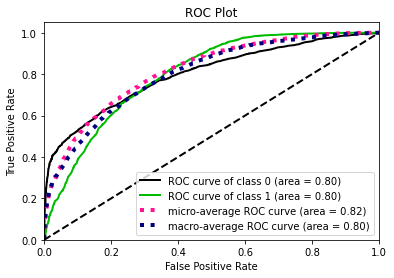

In [119]:
#plotting the ROC curve
!pip install scikit_plot
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, probs, title = 'ROC Plot')

There is an increase in auc. 
The higher AUC means that this model is better than the previous models for predicting functional (1) classes as 1 and non_functional as 0. 
The lower log loss makes the model a better algorithm than the previous model for making predictions.

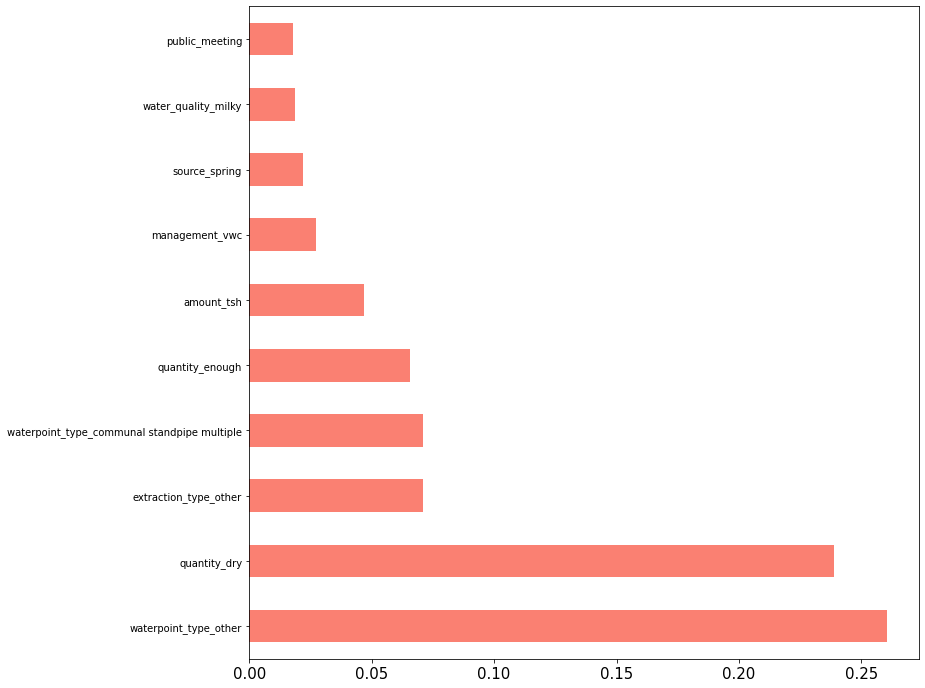

In [237]:
#plotting the ten most important features in this analysis
(pd.Series(final_model.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh',  color="salmon", figsize=(12, 12))) 
plt.savefig("features.jpg")

Some of the most important features in this analysis are waterpoint type, quantity of water(dry),
waterpoint type(communal standpipe), quantuty_enough, amount in tanzanian shillings and management type. 
These features are important in determining whether a waterpoint would be functional or non_functional.

### Conclusion

Tanzania faces a huge challenge of water crisis exercabeted by high failure rates of the waterpoints.
The analysis was able to predict test data with an accuracy of 0.73, a precision of 0.7 and recall of 0.89. The accuracy of 73% tells us that our model will assign the correct label; functional as 1 or non functional as 0 73% of the time.Our recall of 89% means that our model is able to identify 89% of the true positives 73% of the time. The recall is the true positive rate.
This analysis did not support literature that scheme management is one of the most important features that affects failure rates of waterpoints. Scheme management is ranked 7th in the feature importance scale.


However, it showed that type of waterpoint technology, type of extraction and amount paid for water affects the failure rates of these waterpoint types. The presence of communal types (multiple)and other types are indicators of non_functional waterpoints, drier areas, those waterpoints managed by vwc and waterpoints that do not require payment tend to have poor conditions and not function. The results therefore show that NGOs should focus on investing in communal standpipes that do not have the multiple pump technology, extraction type such as gravity and ensuring water quantity is sufficient in order to ensure reduction of failure rates of waterpoints. Most of these features highlight the 'other' type which means that more information needs to be collected to explore which other types of extraction_type and waterpoint type technologies which would ultimately help reduce failure rates.

### Recommendations

It is evident that effective interventions are needed to address the challenges of water shortages in Tanzania. The model provided can be used to predict data points and determine whether they are functional or not with a recall of 89%. 
This predictive analysis showed that NGOs need to pay more attention to waterpoint technologies, the payment
made by population to access water, the extraction type and quantity of water that population access.
Factors such as quantity, extraction type and water point technologies can be modified by NGOs. 



NGOs should 
invest in better water pump technologies such as communal waterpoints and handpumps that are more functional, address payment issues as areas where populations do not pay have more nonfunctional pumps which might mean that these waterpoints serve more populations and are likely to fail at higher rates. Furthermore, areas which are drier lead to nonfunctional pumps perhaps due to low usage and hence NGOs need to invest in technology that ensures all pumps can access water use and can be used continously. This analysis was converted to a binary classification and hence there is a level 
of predictive error when it comes to distinguishing between pumps that are functional but need repair and those 
that are completely non_functional.